In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, classification_report


%matplotlib inline
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

# Airline Passenger Satisfaction
#### [Источник: Kaggle. Airline Passenger Satisfaction.](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction)

Датасет содержит результаты опроса пассажиров авиалиний о степени их удовлетворенности перелетом. 

**Цель исследования** — выявить факторы, которые наиболее сильно влияют на удовлетворенность или неудовлетворенность пассажиров, а также построить модель для прогнозирования уровня удовлетворенности пассажиров.

**Задача машинного обучения**

Цель состоит в решении задачи бинарной классификации. Необходимо предсказать, удовлетворен ли пассажир перелетом на основе данных об их характеристиках и предоставленных услугах.

**Целевая переменная**

*Satisfaction* — уровень удовлетворенности пассажира (Satisfaction, neutral or dissatisfaction).

**Описание столбцов датасета**

- Gender — Пол пассажира (Female, Male).
- Customer Type — Тип клиента (Loyal customer — лояльный клиент; disloyal customer — нелояльный клиент).
- Age — Возраст пассажира.
- Type of Travel — Цель поездки (Personal Travel — личная поездка; Business Travel — деловая поездка).
- Class — Класс обслуживания (Business, Eco, Eco Plus).
- Flight distance — Дистанция перелета (в километрах).
- Inflight wifi service — Уровень удовлетворенности интернетом на борту (0 — недоступно; 1-5 — уровень удовлетворенности).
- Departure/Arrival time convenient — Уровень удобства времени отправления и прибытия.
- Ease of Online booking — Уровень удобства онлайн-бронирования.
- Gate location — Уровень удобства расположения гейта.
- Food and drink — Уровень удовлетворенности едой и напитками.
- Online boarding — Уровень удобства онлайн-посадки.
- Seat comfort — Уровень комфорта сидений.
- Inflight entertainment — Уровень удовлетворенности развлечениями на борту.
- On-board service — Уровень качества обслуживания на борту.
- Leg room service — Уровень удобства пространства для ног.
- Baggage handling — Уровень удовлетворенности обработкой багажа.
- Check-in service — Уровень удобства регистрации.
- Inflight service — Уровень качества обслуживания на борту.
- Cleanliness — Уровень чистоты.
- Departure Delay in Minutes — Задержка отправления (в минутах).
- Arrival Delay in Minutes — Задержка прибытия (в минутах).
- Satisfaction — Целевая переменная, уровень удовлетворенности пассажира (Satisfaction, neutral or dissatisfaction).


In [4]:
df = pd.read_csv("airline_passenger_sat.csv", index_col=0)
df_train = df.iloc[:103905]
df_test = df.iloc[103905:]

display(df_train.head())
display(df_test.head())

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103905,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
103906,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
103907,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
103908,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied
103909,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.0,satisfied


#### Для удобства переименуем названия столбцов (уберем пробелы и спец символы)

In [6]:
df_train.columns = [re.sub(r'[^a-zA-Z0-9_]', '', col) for col in df_train.columns]
df_test.columns = [re.sub(r'[^a-zA-Z0-9_]', '', col) for col in df_test.columns]

### Посмотрим пропуски

In [8]:
pd.DataFrame(data = [df_train.isna().sum()/df_train.shape[0]*100, df_test.isna().sum()/df_test.shape[0]*100], index=["Train Null (%)", "Test Null (%)"]).T.style.background_gradient(cmap='viridis')

,Train Null (%),Test Null (%)
id,0.000000,0.000000
Gender,0.000000,0.000000
CustomerType,0.000000,0.000000
Age,0.000000,0.000000
TypeofTravel,0.000000,0.000000
Class,0.000000,0.000000
FlightDistance,0.000000,0.000000
Inflightwifiservice,0.000000,0.000000
DepartureArrivaltimeconvenient,0.000000,0.000000
EaseofOnlinebooking,0.000000,0.000000


#### Выводы

**Большинство признаков не имеют пропусков:**
- Все признаки, за исключением одного, в тренировочном и тестовом наборах данных имеют 0% пропусков, что говорит о полноте и пригодности данных.

**Исключение — признак ArrivalDelayinMinutes:**
- В тренировочном наборе данных 0.298352% (около 0.3%) значений в этом признаке отсутствуют.
- В тестовом наборе данных пропусков немного больше — 0.319526% (около 0.32%).

Эти показатели никак не портят набор данных, поскольку пропуски составляют очень маленьких процент.

**Целевая переменная (satisfaction) полностью заполнена.**

### Проверяем данные на дубли

In [11]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(0, 0)

**Ни в обучающем, ни в тестировочном датасетах нет пропусков**

### Посмотрим на типы данных, их уникальные значения и разделим признаки на числовые (непрерывные и дискретные) и категориальные

поле id никак не влияет на целевую переменную, можем исключить ее из наших датасетов

In [15]:
df_train.drop(columns= "id", inplace = True)
df_test.drop(columns= "id", inplace = True)

In [16]:
df_train.dtypes

Gender                             object
CustomerType                       object
Age                                 int64
TypeofTravel                       object
Class                              object
FlightDistance                      int64
Inflightwifiservice                 int64
DepartureArrivaltimeconvenient      int64
EaseofOnlinebooking                 int64
Gatelocation                        int64
Foodanddrink                        int64
Onlineboarding                      int64
Seatcomfort                         int64
Inflightentertainment               int64
Onboardservice                      int64
Legroomservice                      int64
Baggagehandling                     int64
Checkinservice                      int64
Inflightservice                     int64
Cleanliness                         int64
DepartureDelayinMinutes             int64
ArrivalDelayinMinutes             float64
satisfaction                       object
dtype: object

In [17]:
for i in df_train.columns:
    if len(df_train[i].unique())<50:
        print(f'Уникальные значения {i} : {list(df_train[i].unique())}')
    else:
        print(f'Уникальные значения {i} : условно бесконечное количество значений, так как переменная неперывная')

Уникальные значения Gender : ['Male', 'Female']
Уникальные значения CustomerType : ['Loyal Customer', 'disloyal Customer']
Уникальные значения Age : условно бесконечное количество значений, так как переменная неперывная
Уникальные значения TypeofTravel : ['Personal Travel', 'Business travel']
Уникальные значения Class : ['Eco Plus', 'Business', 'Eco']
Уникальные значения FlightDistance : условно бесконечное количество значений, так как переменная неперывная
Уникальные значения Inflightwifiservice : [3, 2, 4, 1, 5, 0]
Уникальные значения DepartureArrivaltimeconvenient : [4, 2, 5, 3, 1, 0]
Уникальные значения EaseofOnlinebooking : [3, 2, 5, 4, 1, 0]
Уникальные значения Gatelocation : [1, 3, 2, 5, 4, 0]
Уникальные значения Foodanddrink : [5, 1, 2, 4, 3, 0]
Уникальные значения Onlineboarding : [3, 5, 2, 1, 4, 0]
Уникальные значения Seatcomfort : [5, 1, 2, 3, 4, 0]
Уникальные значения Inflightentertainment : [5, 1, 2, 3, 4, 0]
Уникальные значения Onboardservice : [4, 1, 2, 3, 5, 0]
Уникальн

#### 1. Числовые признаки

**Непрерывные:**
- Age — возраст пассажира.
- FlightDistance — расстояние перелета.
- DepartureDelayinMinutes — задержка отправления в минутах.
- ArrivalDelayinMinutes — задержка прибытия в минутах.
  
**Дискретные (целочисленные категории):**
- Inflightwifiservice — уровень удовлетворенности Wi-Fi на борту (0–5).
- DepartureArrivaltimeconvenient — уровень удобства времени отправления/прибытия (0–5).
- EaseofOnlinebooking — уровень удобства онлайн-бронирования (0–5).
- Gatelocation — уровень удобства расположения гейта (0–5).
- Foodanddrink — уровень удовлетворенности едой и напитками (0–5).
- Onlineboarding — уровень удобства онлайн-посадки (0–5).
- Seatcomfort — уровень удовлетворенности комфортом сидений (0–5).
- Inflightentertainment — уровень удовлетворенности развлечениями на борту (0–5).
- Onboardservice — уровень качества обслуживания на борту (0–5).
- Legroomservice — уровень удовлетворенности пространством для ног (0–5).
- Baggagehandling — уровень удовлетворенности обработкой багажа (0–5).
- Checkinservice — уровень удобства регистрации (0–5).
- Inflightservice — уровень качества обслуживания на борту (0–5).
- Cleanliness — уровень чистоты (0–5).

#### 2. Категориальные признаки

**Nominal (номинальные):**
- Gender — пол пассажира (Female, Male).
- CustomerType — тип клиента (Loyal customer, Disloyal customer).
- TypeofTravel — цель поездки (Personal Travel, Business Travel).
- Satisfaction — уровень удовлетворенности (Satisfaction, Neutral or Dissatisfaction).
  
**Ordinal (порядковые):**
- Class — класс обслуживания (Business, Eco, Eco Plus).


In [19]:
for col in ["Gender", "CustomerType", "TypeofTravel" , "satisfaction", "Class"]:
    df_train[col] = df_train[col].astype('category')
    df_test[col] = df_test[col].astype('category')

# Exploratory Data Analysis

Сгруппируем переменные по типу

In [22]:
cat_data = df_train.select_dtypes(include=['category']).columns.tolist()
num_data= df_train.select_dtypes(include=['number']).columns.tolist()

num_disc = [col for col in num_data if df_train[col].nunique() < 50]
num_cont = [col for col in num_data if col not in num_disc]

print("Числовые непрерывные признаки:", num_cont)
print("Числовые дискретные признаки:", num_disc)
print("Категориальные признаки:", cat_data)

Числовые непрерывные признаки: ['Age', 'FlightDistance', 'DepartureDelayinMinutes', 'ArrivalDelayinMinutes']
Числовые дискретные признаки: ['Inflightwifiservice', 'DepartureArrivaltimeconvenient', 'EaseofOnlinebooking', 'Gatelocation', 'Foodanddrink', 'Onlineboarding', 'Seatcomfort', 'Inflightentertainment', 'Onboardservice', 'Legroomservice', 'Baggagehandling', 'Checkinservice', 'Inflightservice', 'Cleanliness']
Категориальные признаки: ['Gender', 'CustomerType', 'TypeofTravel', 'Class', 'satisfaction']


### Информация о переменных

In [24]:
df_train[num_data].describe()

,Age,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes
count,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103905.000000,103595.000000
mean,39.379828,1189.438468,2.729705,3.060305,2.756903,2.976892,3.202127,3.250383,3.439392,3.358173,3.382378,3.351071,3.631846,3.304278,3.640441,3.286367,14.815957,15.178957
std,15.114942,997.147596,1.327842,1.525071,1.398923,1.277619,1.329526,1.349504,1.319082,1.332994,1.288358,1.315608,1.180905,1.265396,1.175665,1.312277,38.230872,38.698599
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [25]:
df_train[cat_data].describe()

,Gender,CustomerType,TypeofTravel,Class,satisfaction
count,103905,103905,103905,103905,103905
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52728,84924,71656,49665,58879


**Для числовых непрерывных переменных** будем строить: 
- histogram для оценки распределения с KDE (ядерной оценкой плотности)
- boxplot для обнаружения выбросов
- violin plot, который объединяет плотность распределения и ящик с усами

**Для числовых дискретных переменных** будем строить: 
- столбчатые диаграммы (barplot) для подсчета количества записей в каждой категории
- boxplot для оценики влияние дискретной переменной на целевую

**Для категориальных переменных** будем строить: 
- столбчатые диаграммы (barplot) для подсчета количества записей в каждой категории
- круговые диаграммы (pie chart) для отображения доли каждой категории

In [27]:
def num_cont_plots(df, cols):
    for col in cols:
        mean = df[col].mean()
        median = df[col].median()
        
        fig, axs = plt.subplots(1, 3, figsize=(18, 5))
        sns.histplot(df[col], kde=True, ax=axs[0], color='skyblue')
        axs[0].axvline(mean, color='red', linestyle='-', label=f'Матожидание: {mean:.2f}')
        axs[0].axvline(median, color='green', linestyle='--', label=f'Медиана: {median:.2f}')
        axs[0].legend()
        axs[0].set_title(f'Гистограмма для {col}')
        axs[0].set_xlabel(col)
        axs[0].set_ylabel('Частота')
        
        sns.boxplot(x=df[col], ax=axs[1], color='lightgreen')
        axs[1].set_title(f'Ящик с усами для {col}')
        axs[1].set_xlabel(col)
        
        sns.violinplot(x=df[col], ax=axs[2], color='orange')
        axs[2].set_title(f'Violin plot для {col}')
        axs[2].set_xlabel(col)
        
        plt.tight_layout()
        plt.show()


def num_disc_plots(df, cols, target):
    for col in cols:
        fig, axs = plt.subplots(1, 2, figsize=(18, 5))
        value_counts = df[col].value_counts().sort_index()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axs[0], palette='Set2')
        axs[0].set_title(f'Barplot для {col}')
        axs[0].set_ylabel('Количество')
        for i, v in enumerate(value_counts.values):
            axs[0].text(i, v, str(v), ha='center', fontsize=10)
        
        sns.boxplot(x=df[col], y=df[target], ax=axs[1], palette='Set2')
        axs[1].set_title(f'boxplot: {col} & {target}')
        axs[1].set_xlabel(col)
        axs[1].set_ylabel(target)
        
        plt.tight_layout()
        plt.show()


def cat_plots(df, cols):
    for col in cols:
        fig, axs = plt.subplots(1, 2, figsize = (18, 5))
        value_counts = df[col].value_counts()
        sns.barplot(x=value_counts.index, y=value_counts.values, ax=axs[0], palette='deep')
        axs[0].set_title(f'Barplot для {col}')
        axs[0].set_ylabel('Количество')
        for i, v in enumerate(value_counts.values):
            axs[0].text(i, v, str(v), ha='center', fontsize=10)

        df[col].value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', colors=sns.color_palette('deep'))
        axs[1].set_title(f'Pie Chart для {col}')
        axs[1].set_ylabel('')

        plt.tight_layout()
        plt.show()

## Распределение целевой переменной

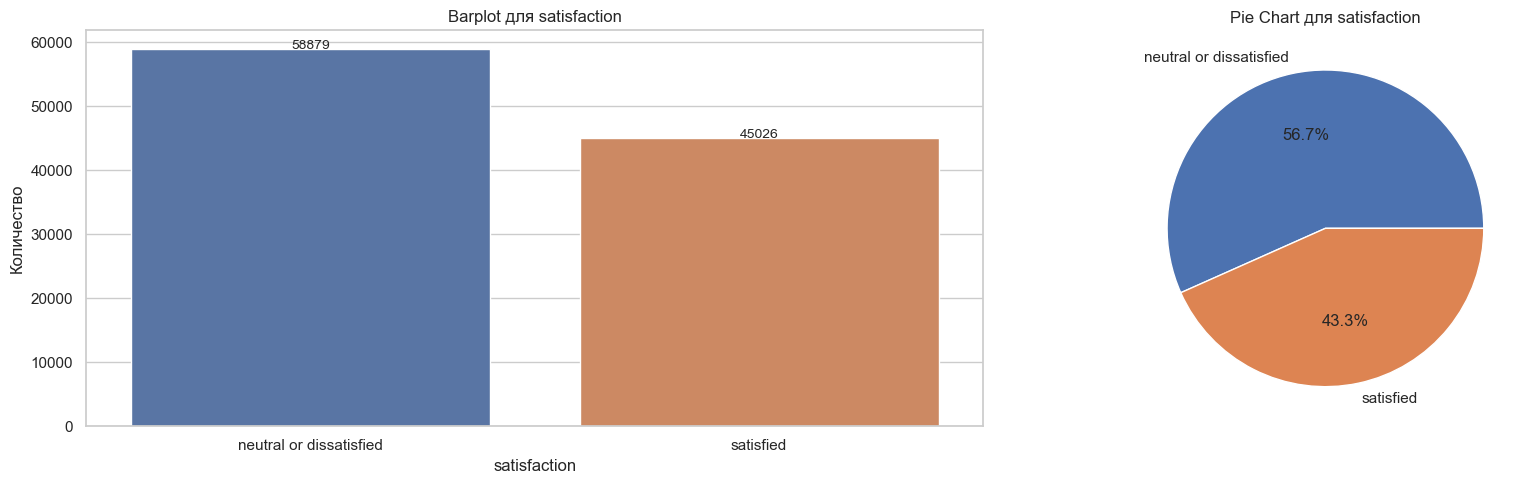

In [29]:
cat_plots(df_train, ["satisfaction"])

- Большинство значений целевой переменной в обучающем датасете относятся к категории neutral or dissatisfied (примерно 56.7%)
- Категория satisfied встречается реже (примерно 43.3%)

## Графики для числовых непрерывных переменных

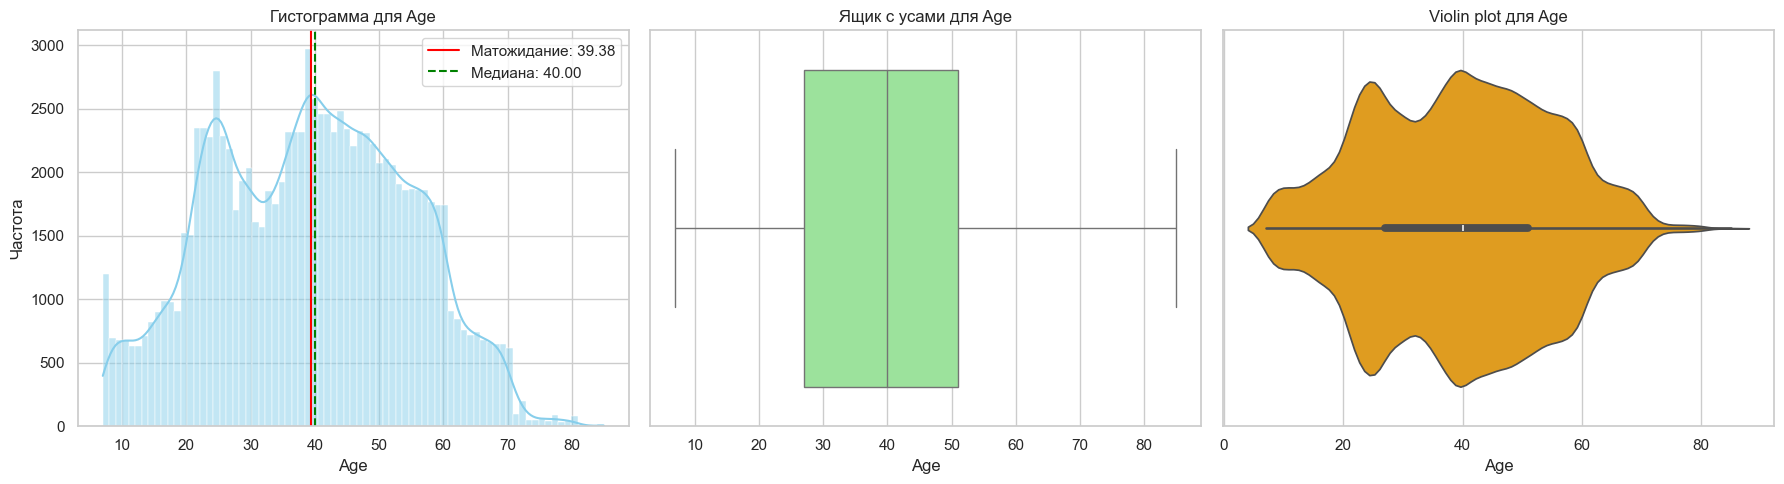

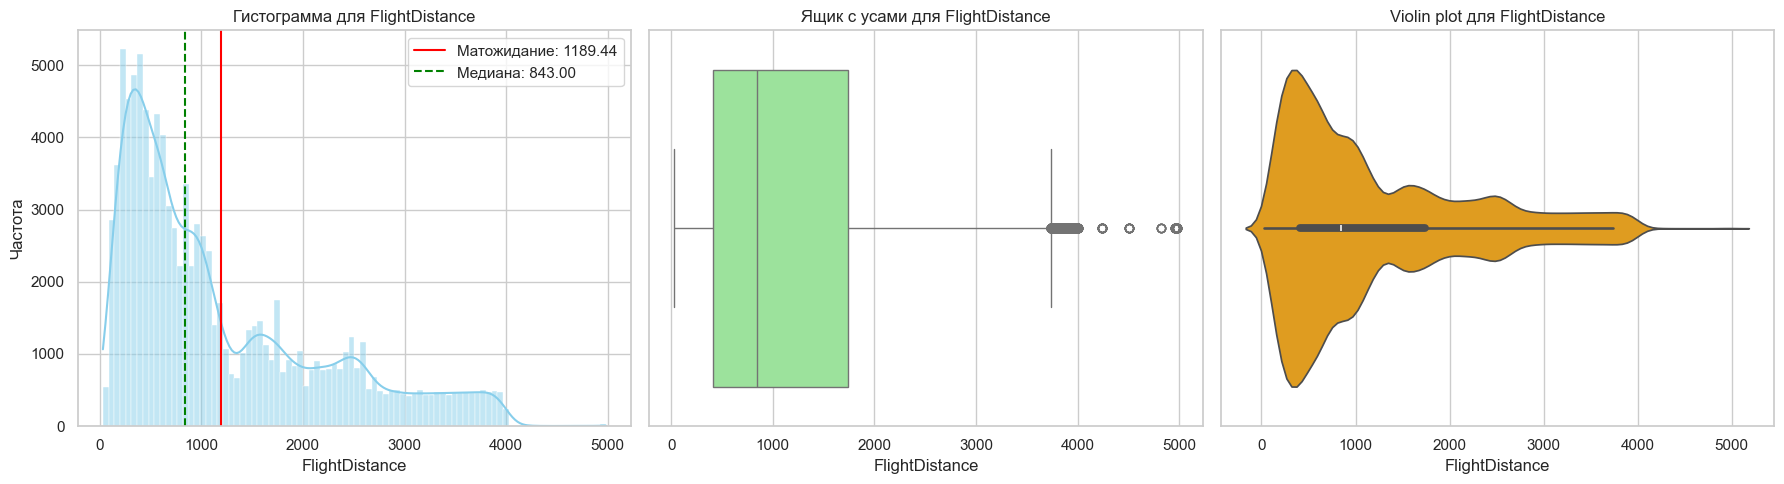

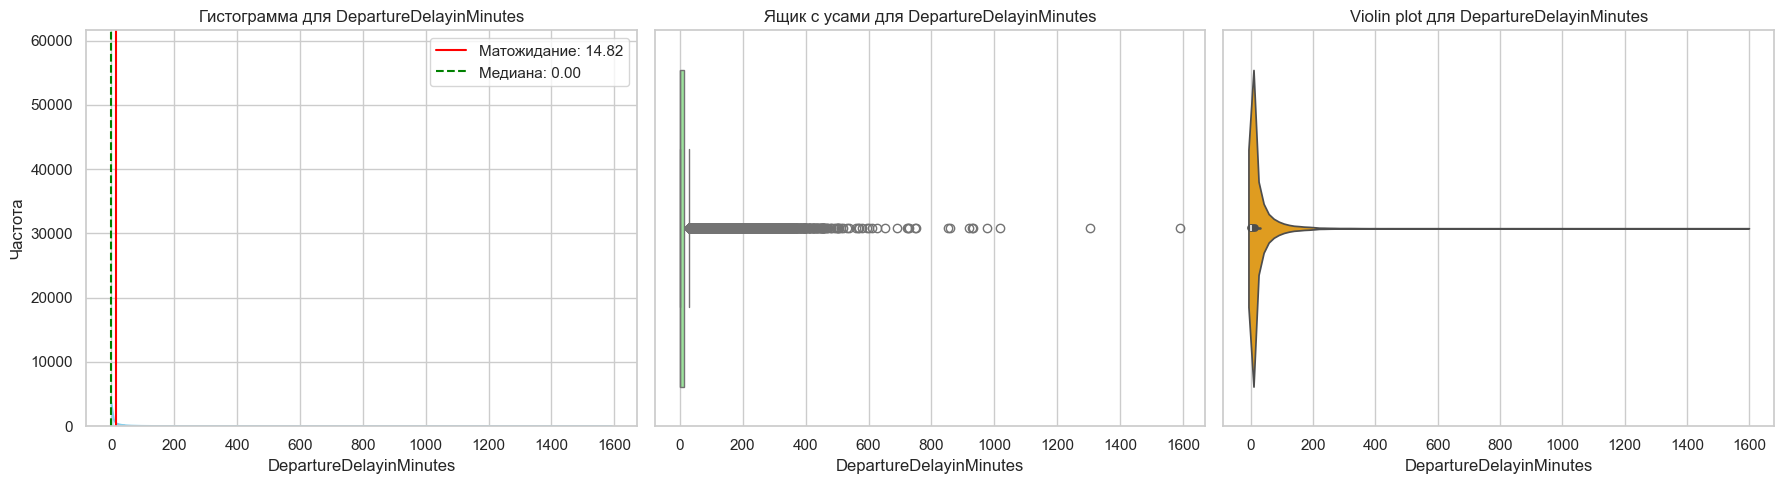

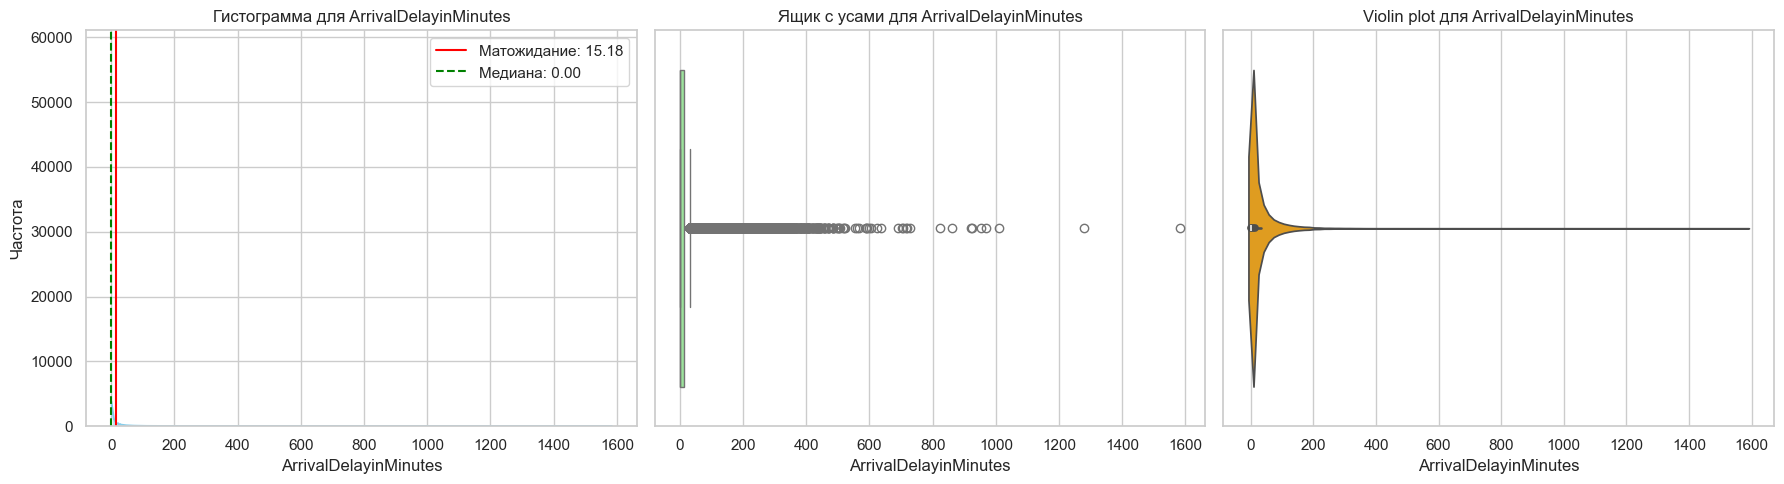

In [32]:
num_cont_plots(df_train, num_cont)

**Age:**

- Распределение близко к нормальному
- Выбросов нет, данные хорошо сбалансированы
- Можно использовать эту переменную без дополнительных преобразований

**FlightDistance:**

- Сильно асимметричное распределение с длинным правым хвостом
- Большое количество выбросов, особенно для значений выше 2500 км

**ArrivalDelayinMinutes и DepartureDelayinMinutes:**
- Обе переменные имеют схожее распределение: сильно скошены влево с длинными правыми хвостами
- Большинство значений — 0 минут (отсутствие задержек)

## Графики для числовых дискретных переменных

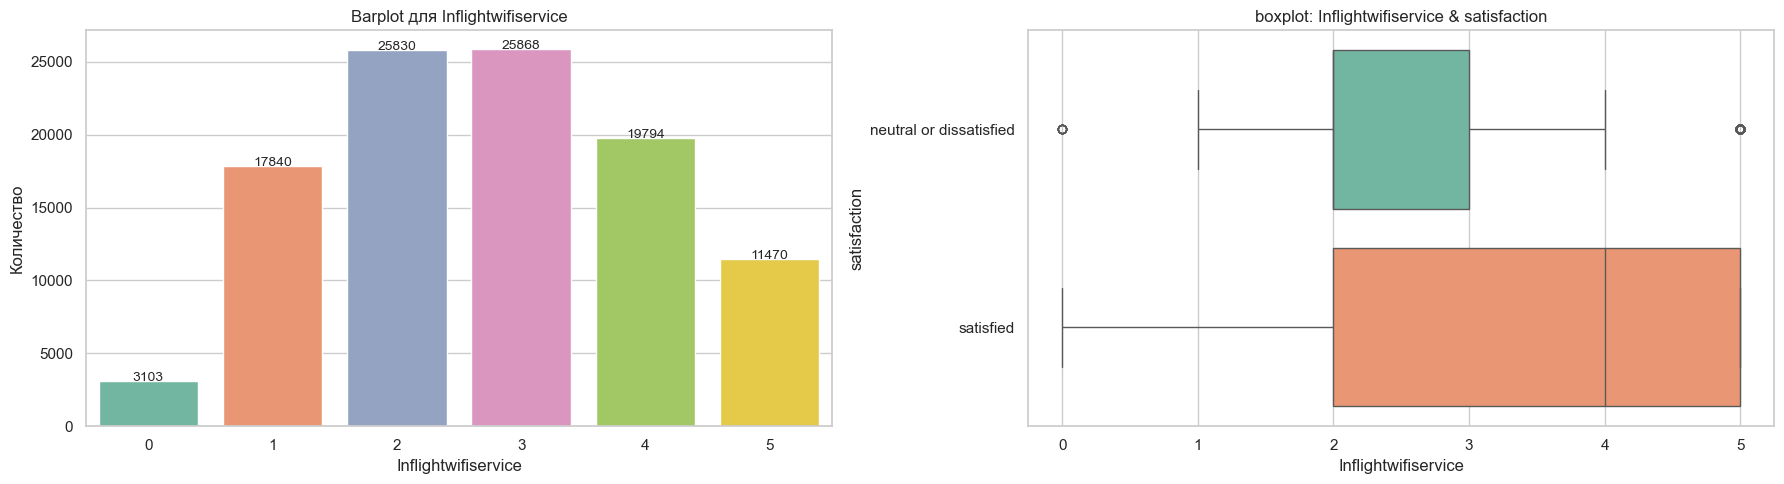

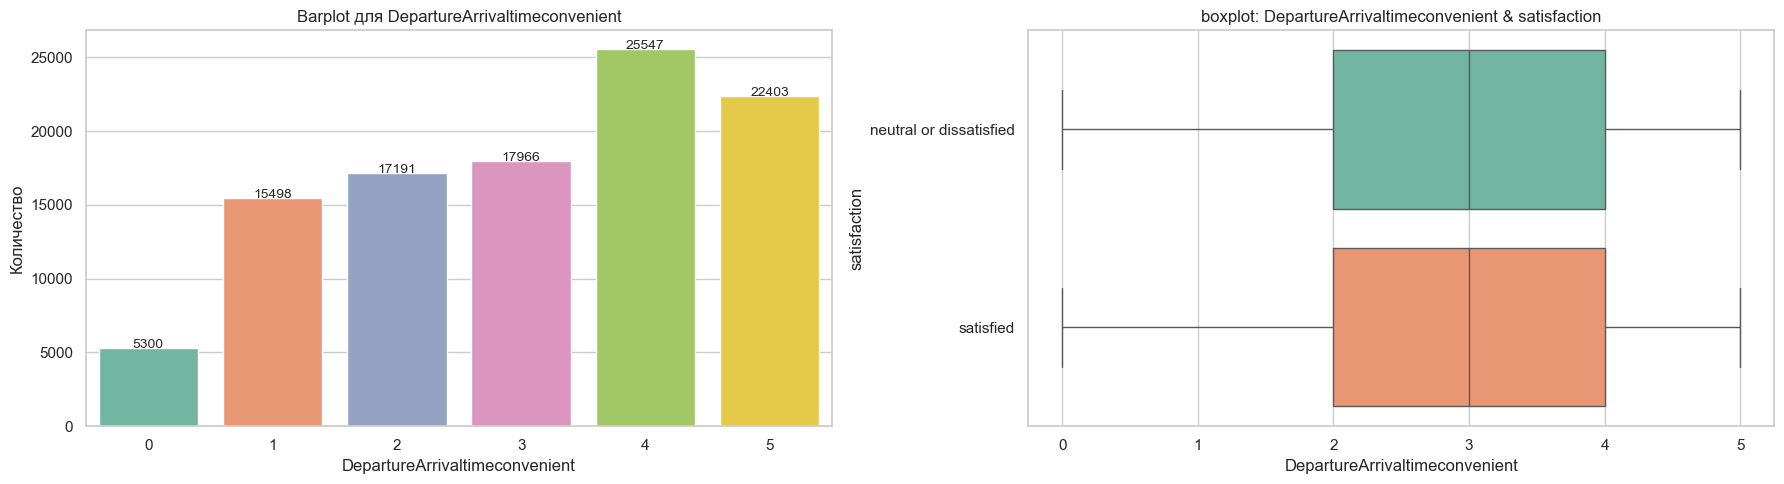

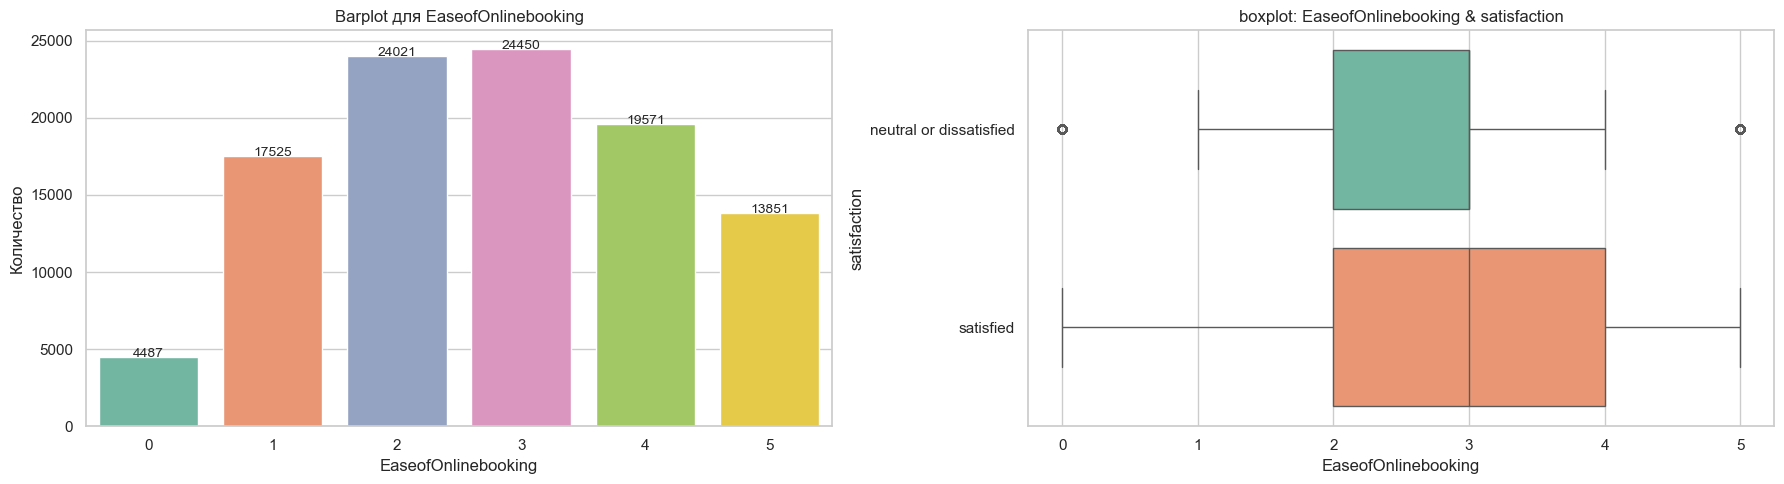

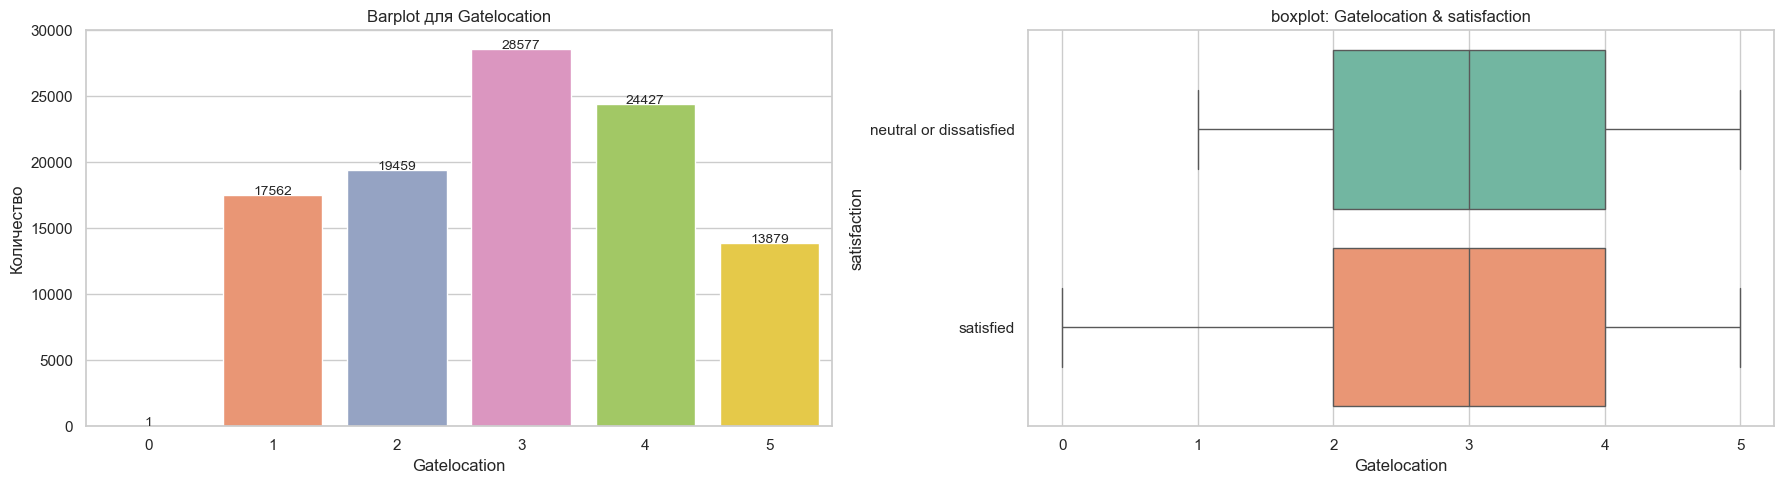

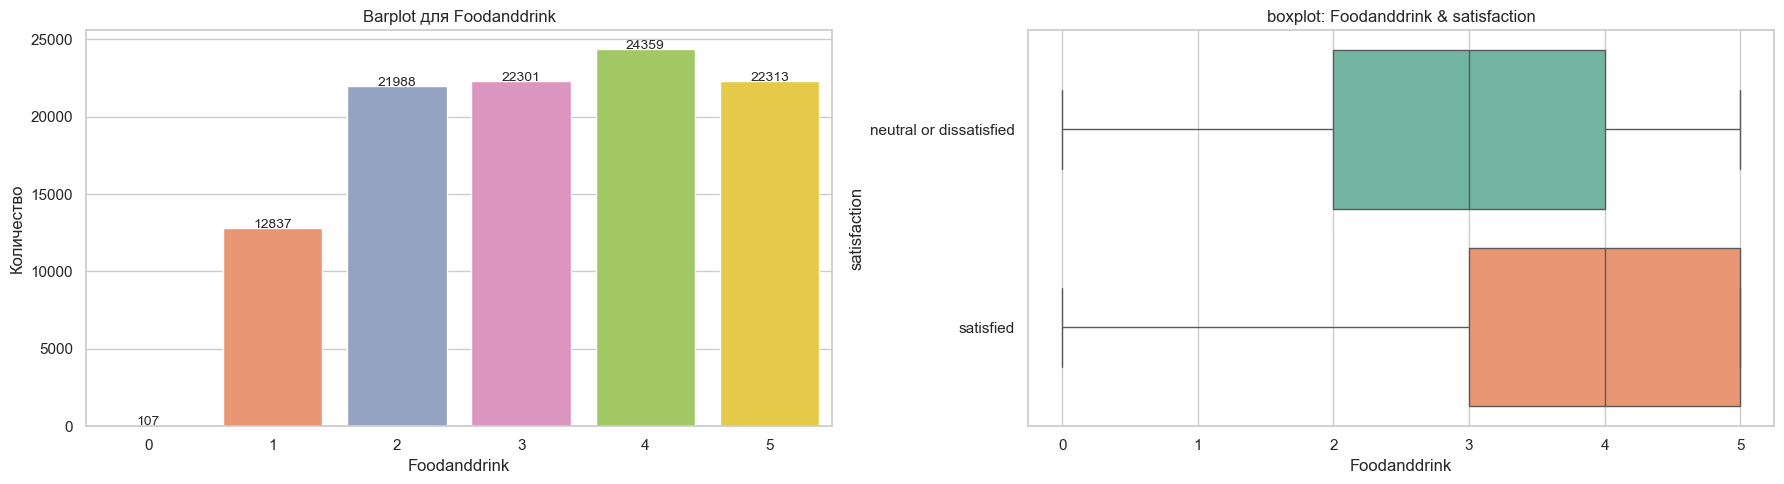

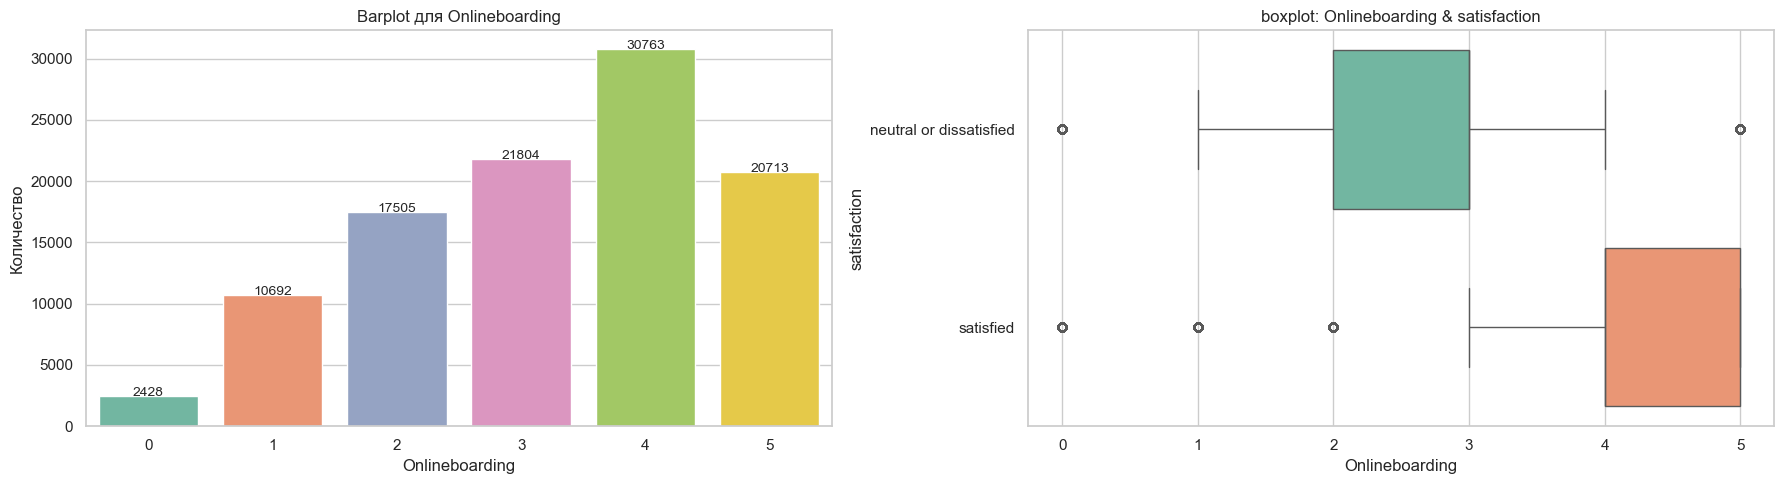

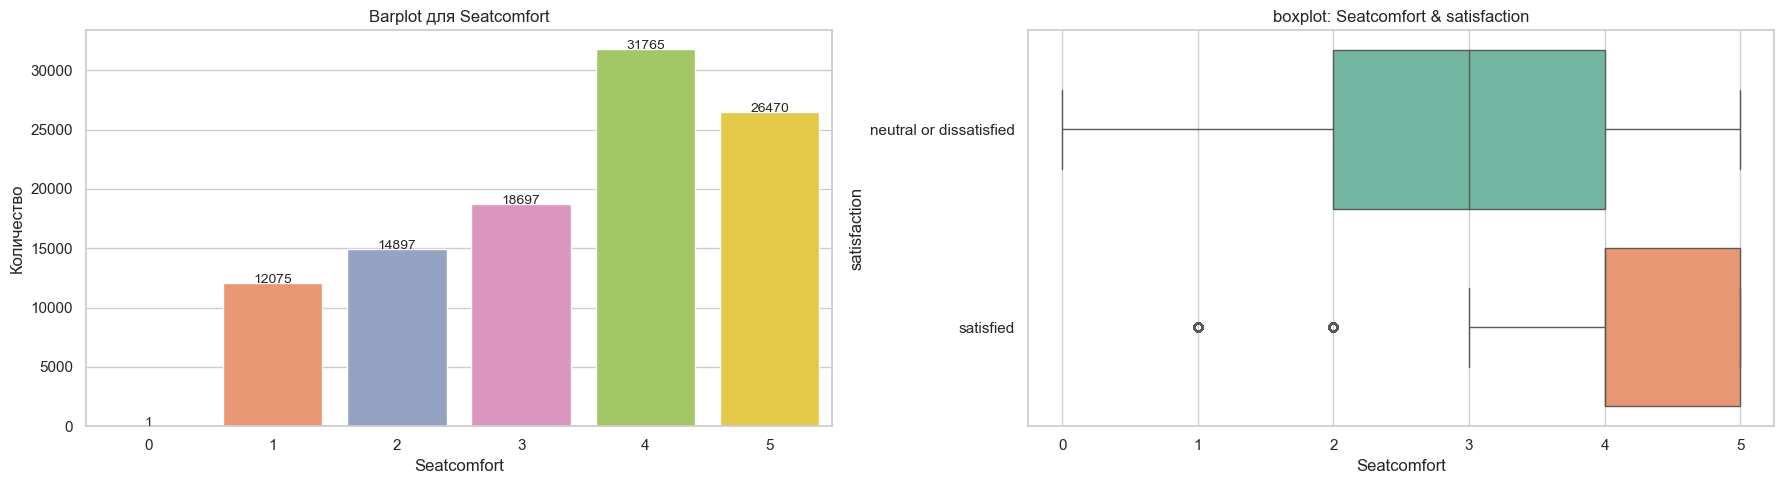

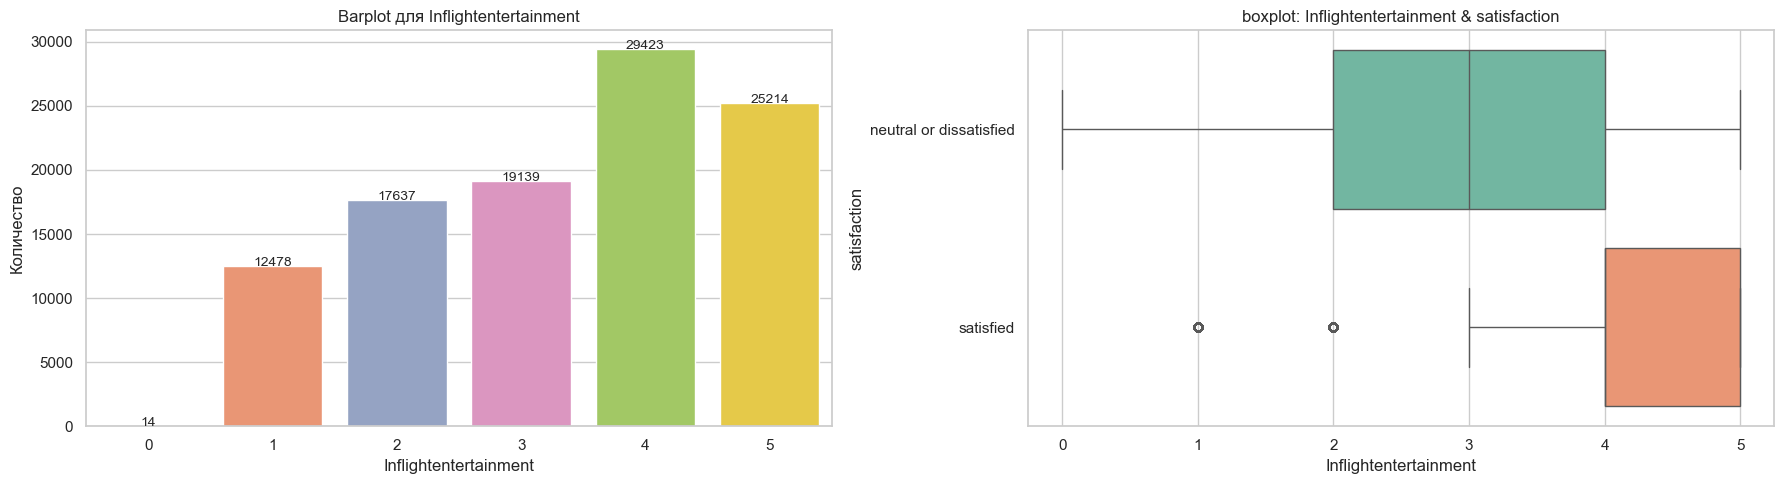

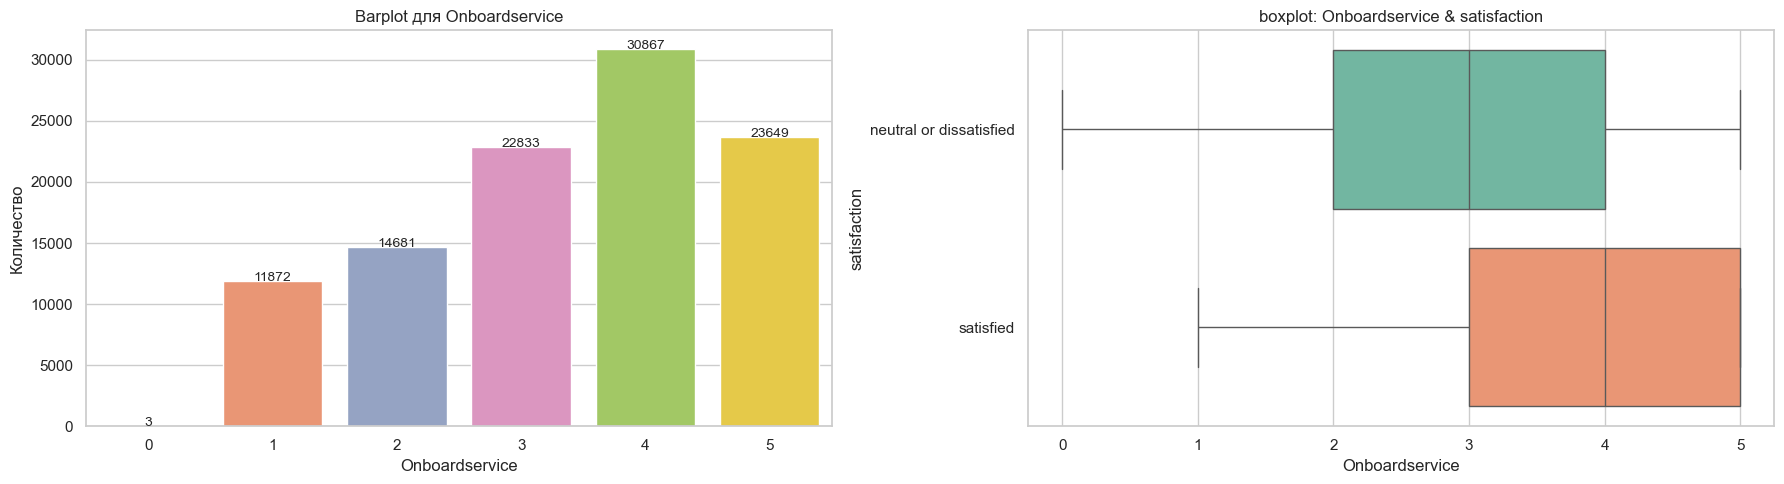

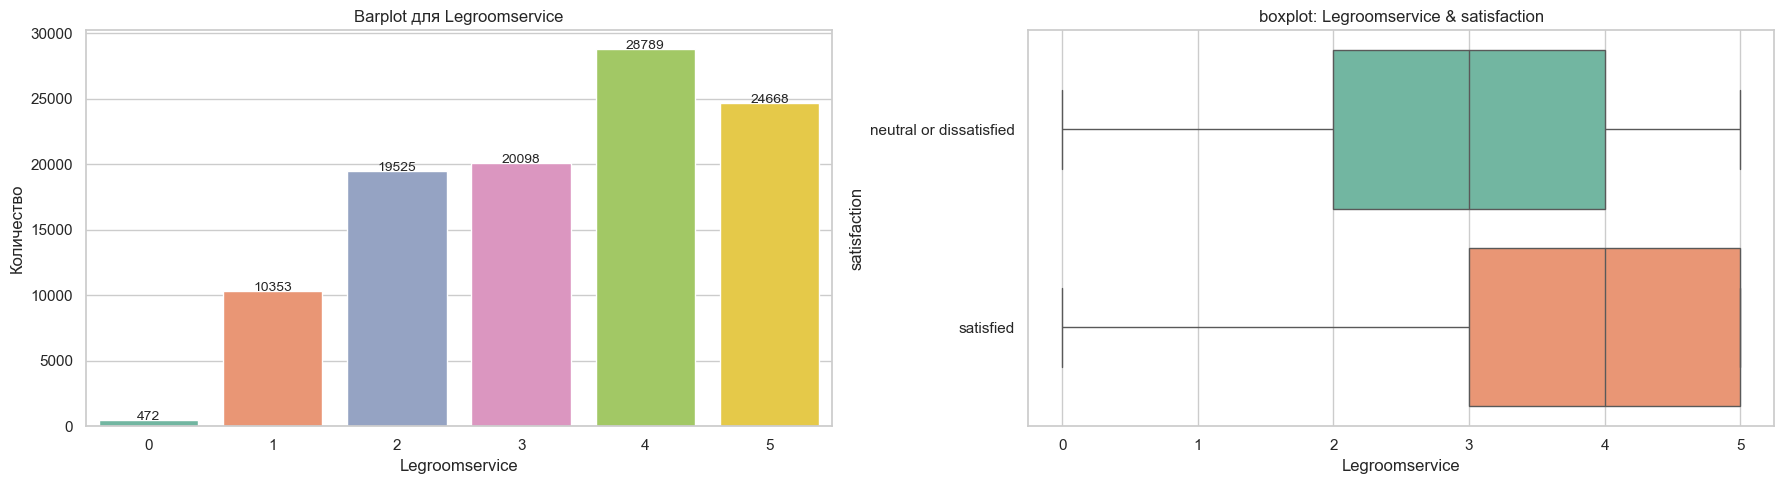

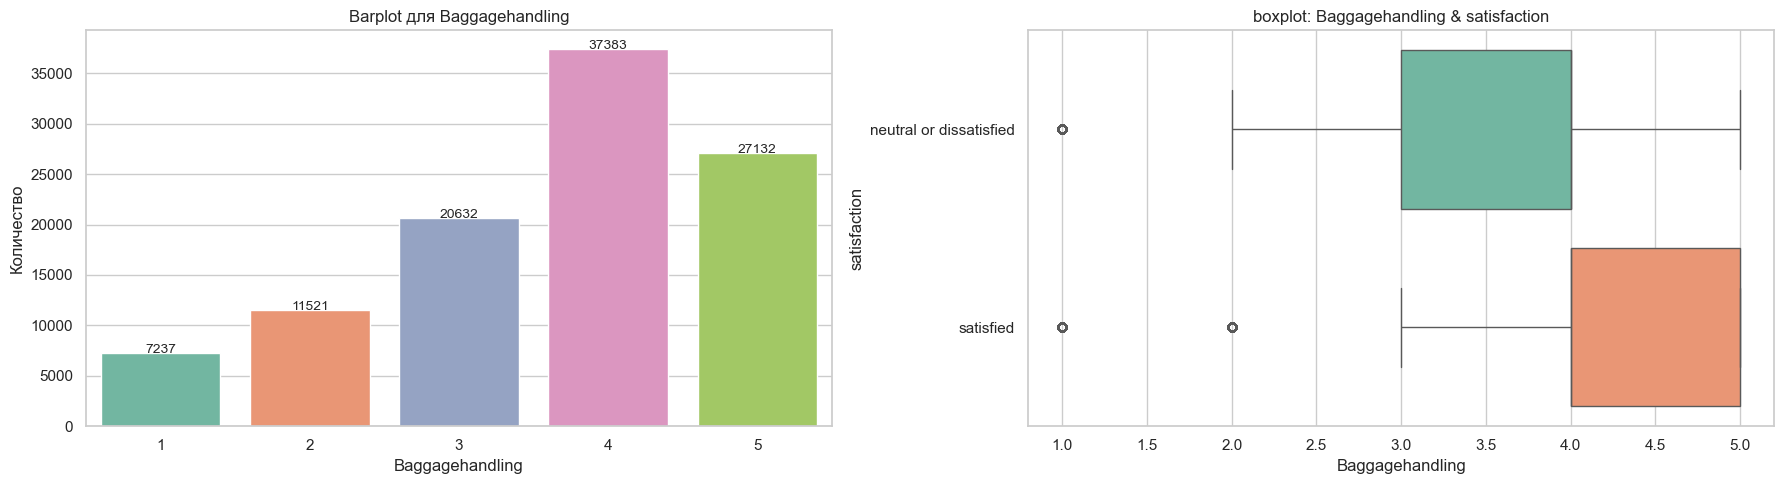

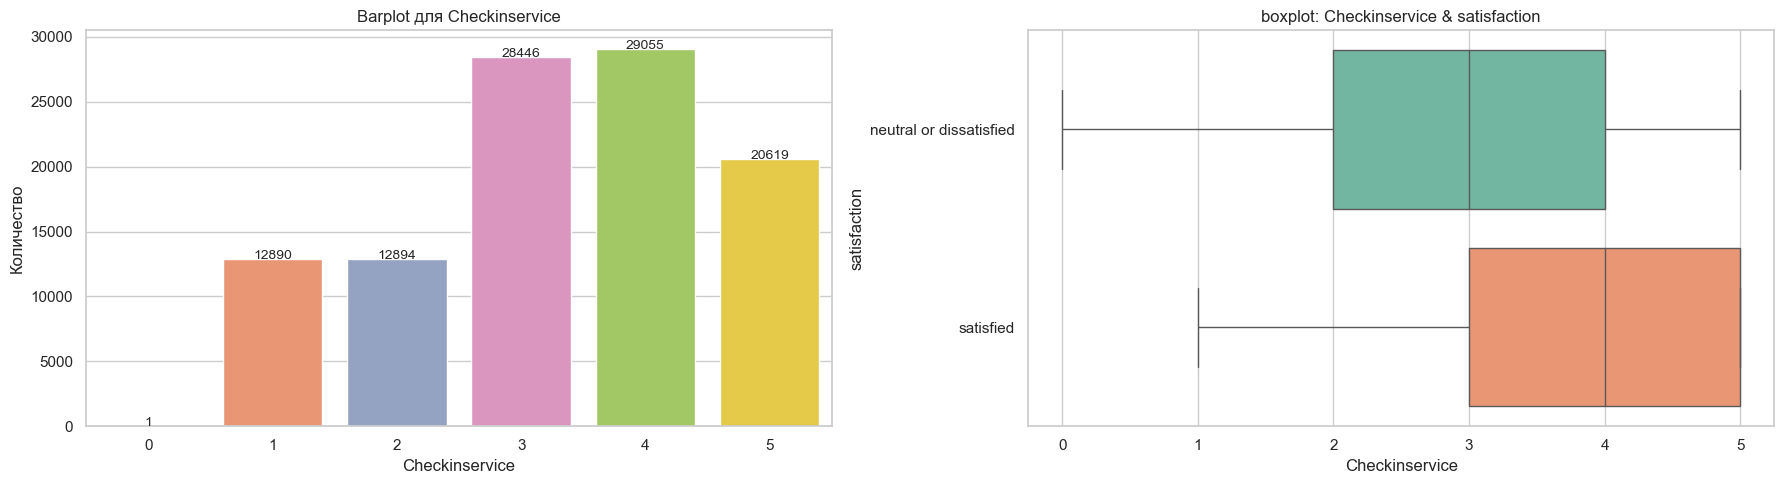

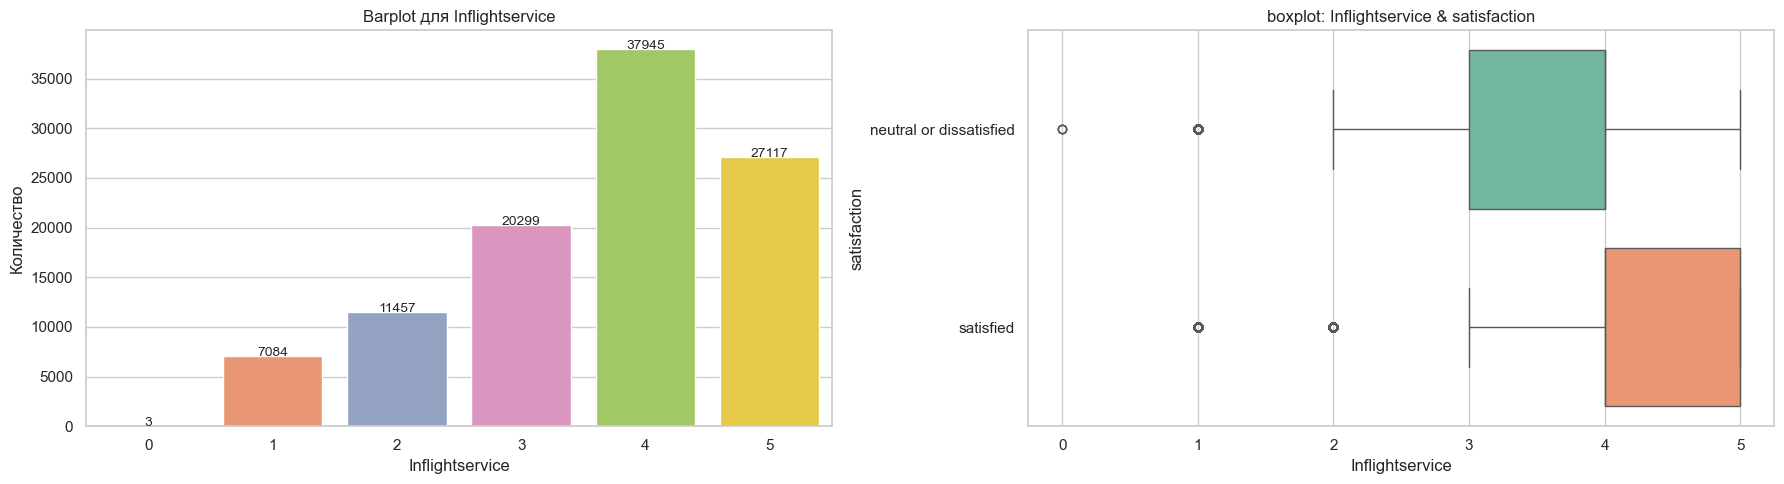

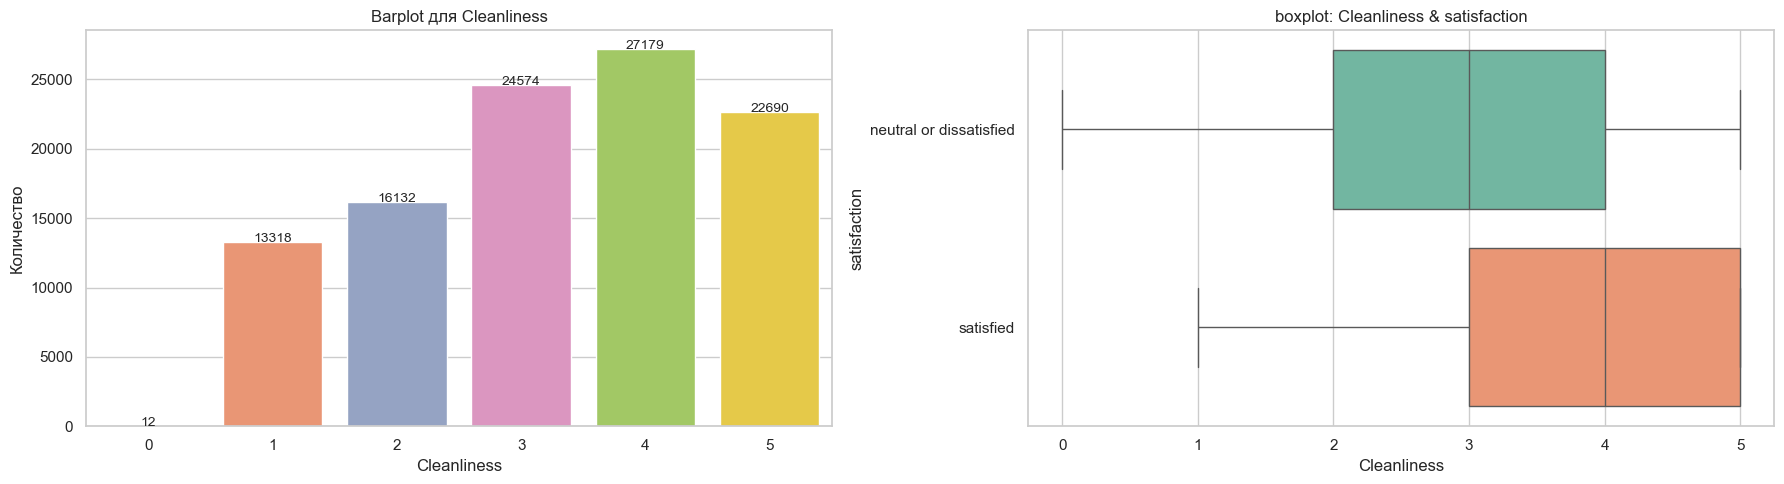

In [35]:
num_disc_plots(df_train, num_disc, "satisfaction")

**Inflightwifiservice:**

- Качество Wi-Fi сильно влияет на удовлетворенность: пассажиры с высокими оценками Wi-Fi чаще удовлетворены
- Для низких оценок наблюдается значительная неудовлетворенность

**DepartureArrivaltimeconvenient:**

- Высокие оценки увеличивают вероятность удовлетворенности
- Низкие оценки коррелируют с неудовлетворенностью

**...**

Вообще, для всех таких дискретных переменных (связанных с оценкой уровня сервиса, чистоты и тому подобного) можно сделать единый вывод:
- Высокие оценки увеличивают вероятность удовлетворенности
- Низкие оценки связаны с неудовлетворенностью

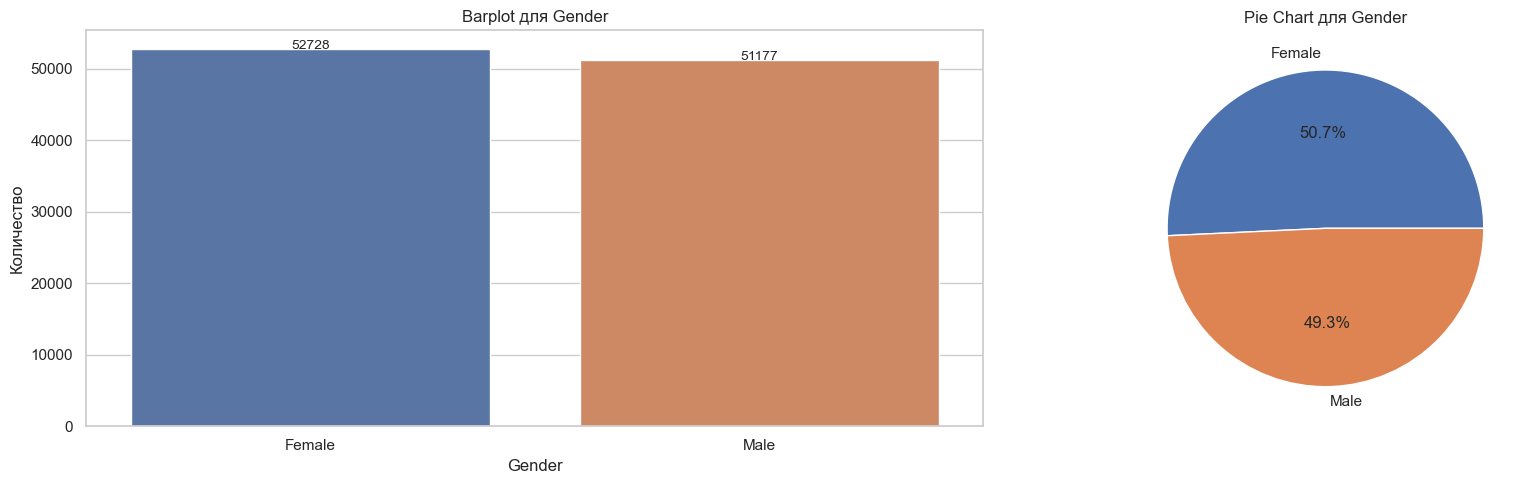

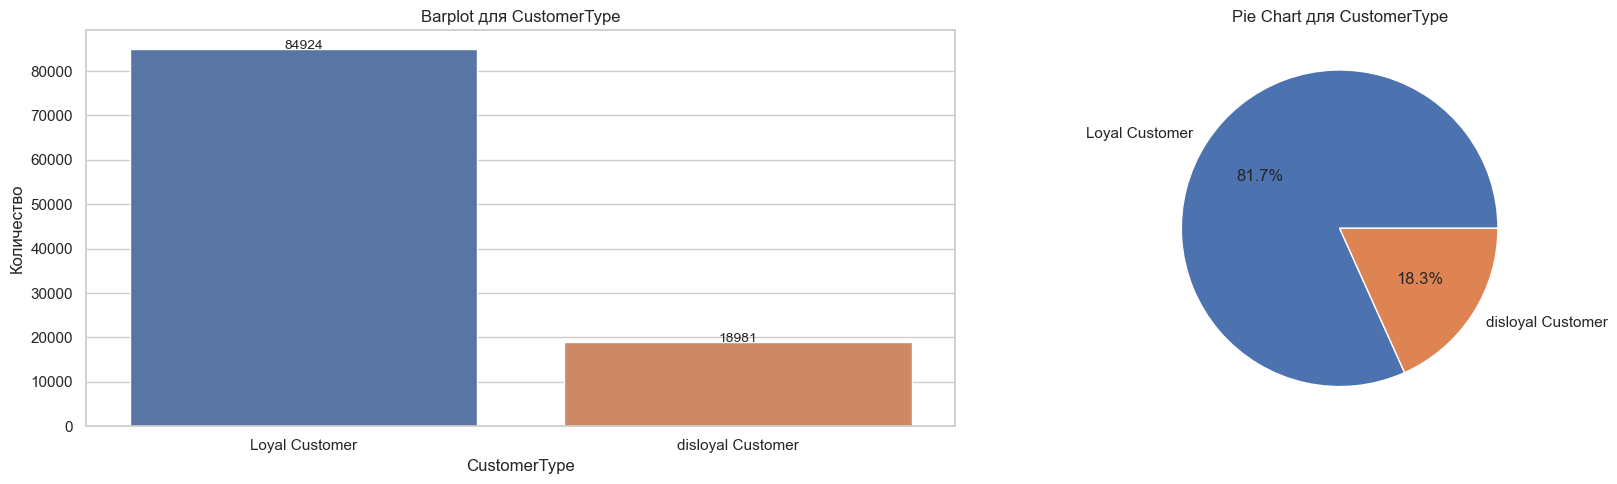

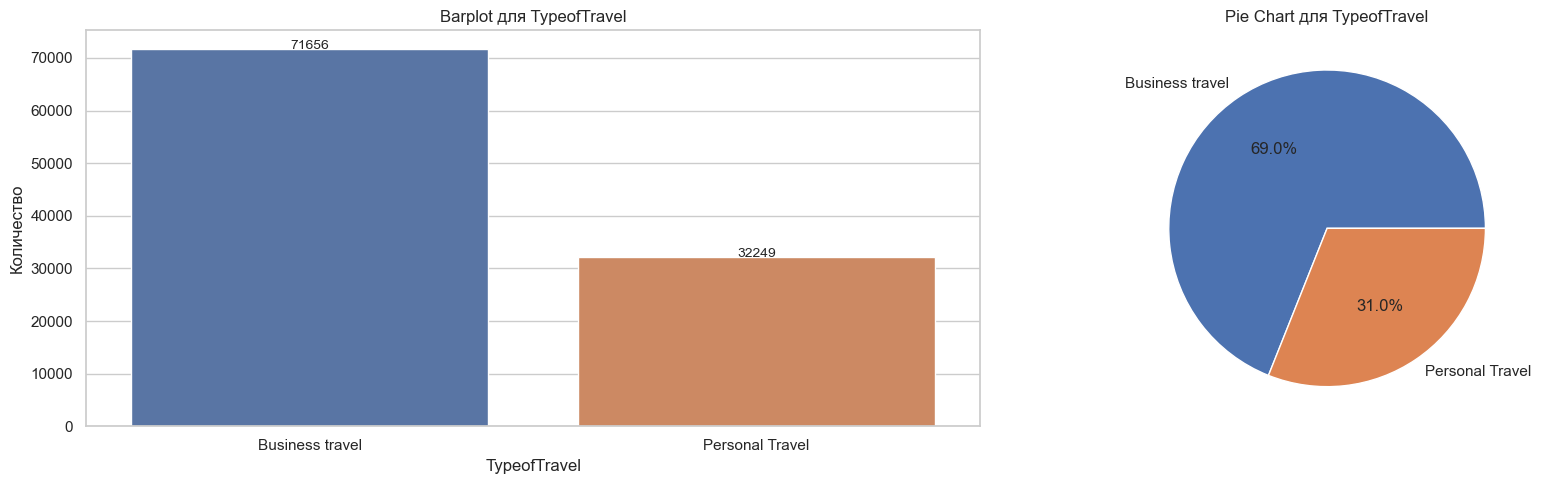

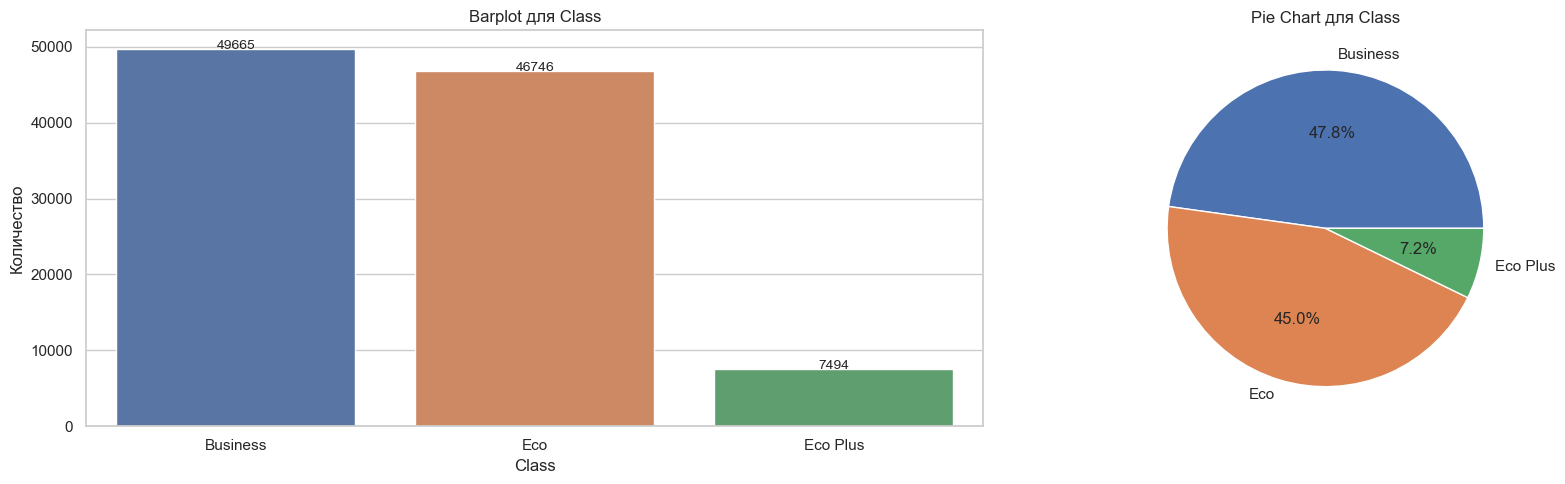

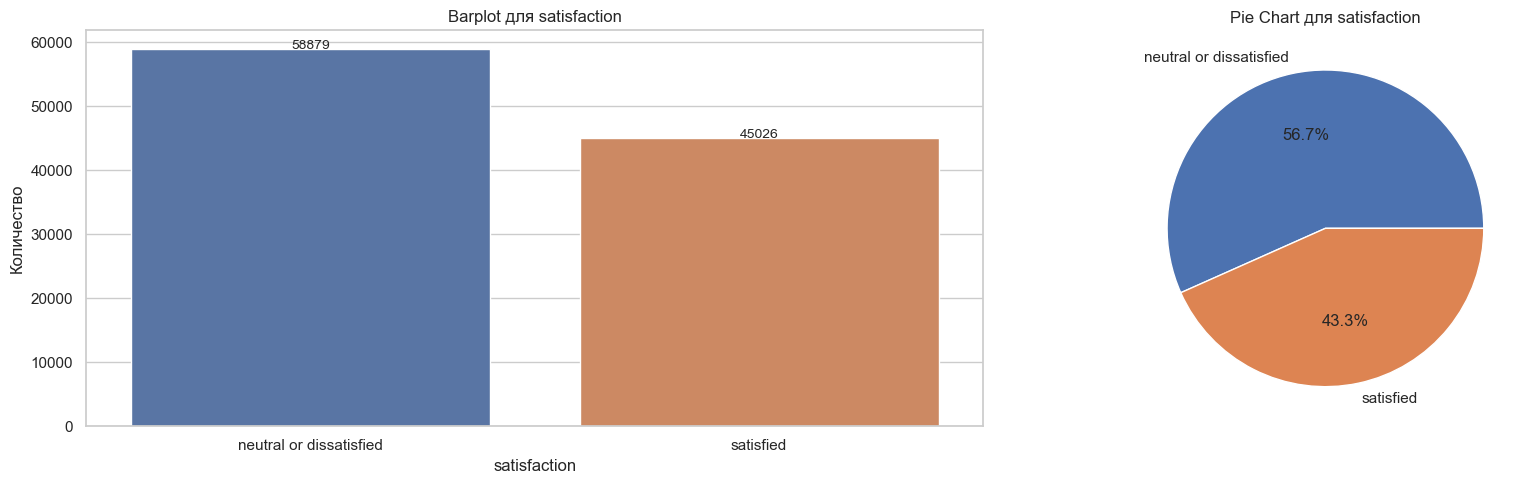

In [37]:
cat_plots(df_train, cat_data)

- Данные показывают сбалансированное распределение по полу.
- Большинство клиентов лояльны и ориентированы на бизнес-поездки.
- Основное распределение по классу обслуживания сосредоточено на Business и Eco, с меньшей долей Eco Plus.

## Посмотрим, насколько переменные коррелируют между собой

In [40]:
df_train['satisfaction_binary'] = df_train['satisfaction'].map({
    'neutral or dissatisfied': 0,
    'satisfied': 1
}).astype(int)



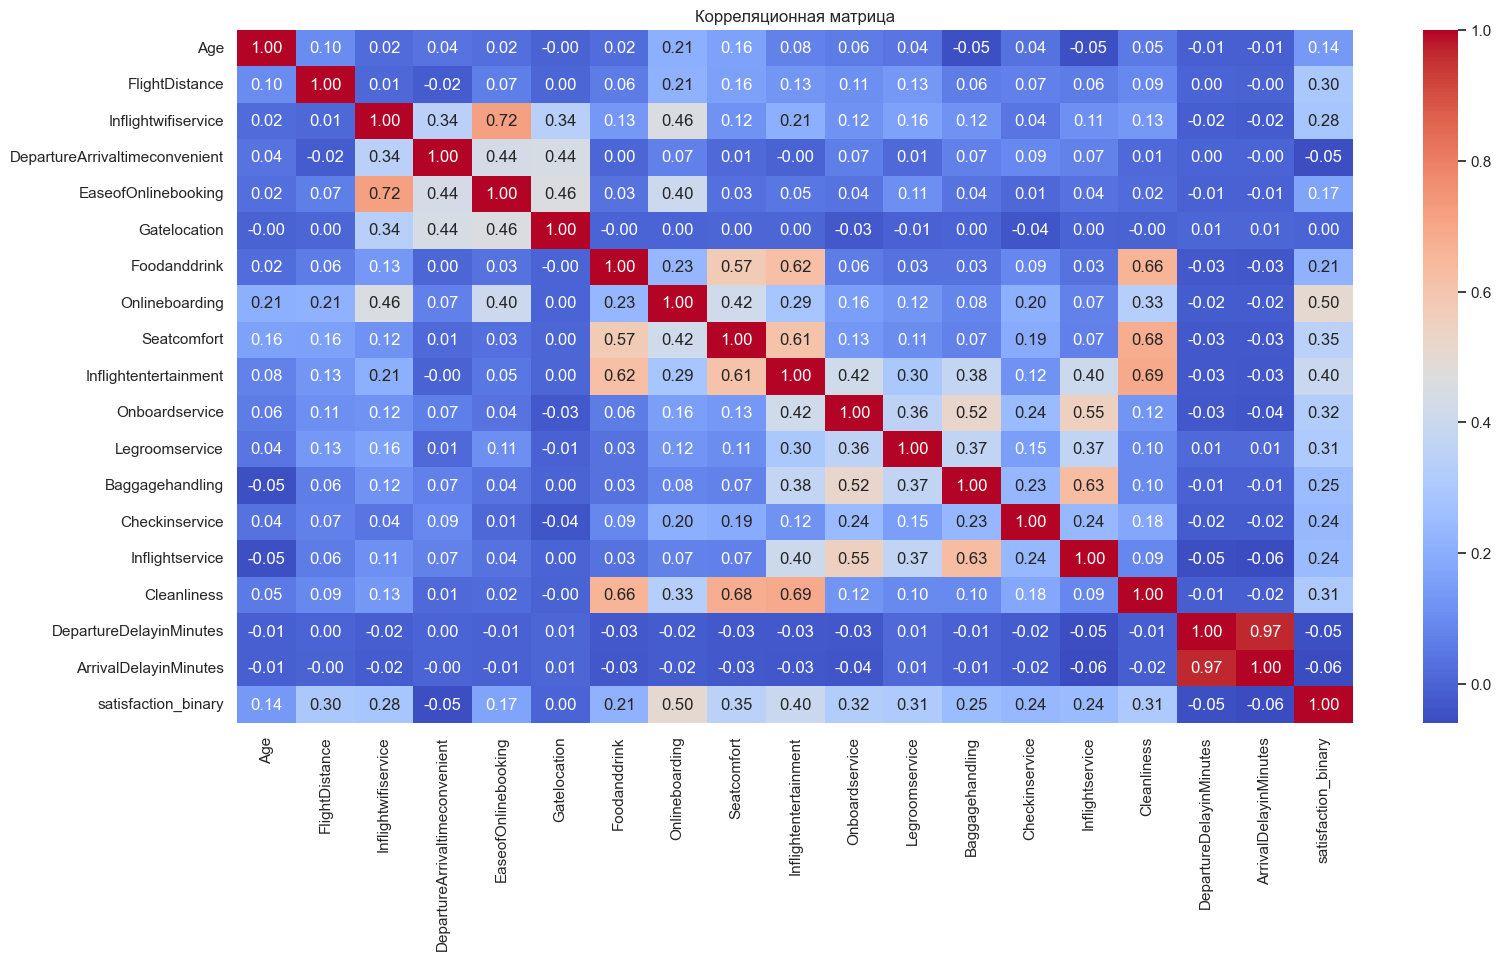

In [41]:
corr_mat = df_train[num_data+['satisfaction_binary']].corr()

plt.figure(figsize=(18, 9))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


**Сильные зависимости:**

- Задержки отправления и прибытия практически полностью коррелируют (0.97)
- Удобство онлайн-бронирования связано с качеством Wi-Fi на борту (0.72)

**Связь качества сервиса:**

- Множество признаков качества обслуживания (чистота, комфорт, развлекательные системы) имеют среднюю корреляцию между собой, что говорит о том, что они воспринимаются как единый комплекс.

In [43]:
most_correlated = corr_mat['satisfaction_binary'].abs().sort_values(ascending=False)
most_correlated_features = most_correlated.index[1:6]
most_correlated_features

Index(['Onlineboarding', 'Inflightentertainment', 'Seatcomfort',
       'Onboardservice', 'Legroomservice'],
      dtype='object')

## Изучим распределение значений числовых признаков, которые больше всего коррелируют с satisfaction для каждой категории satisfaction (0 или 1)

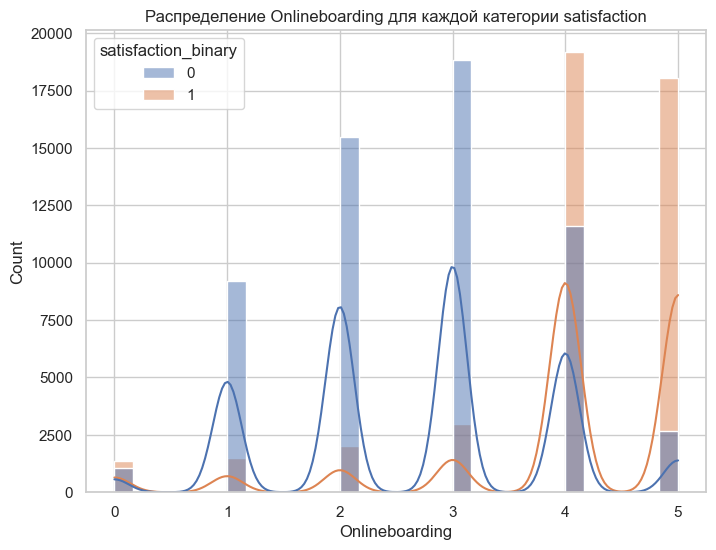

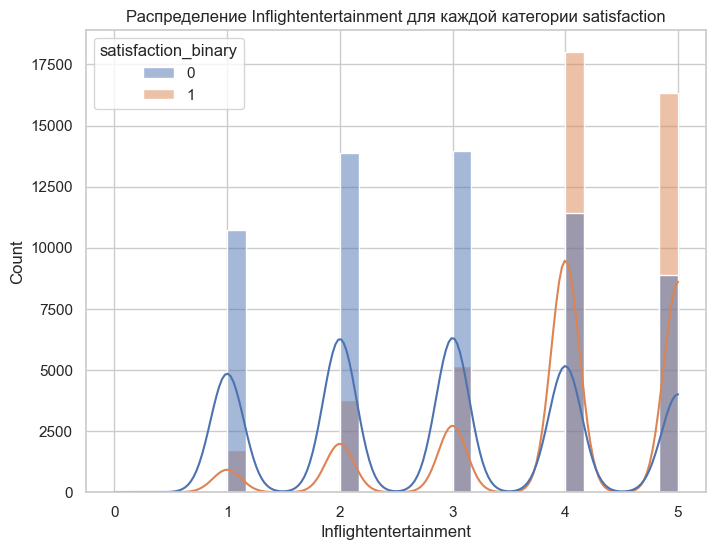

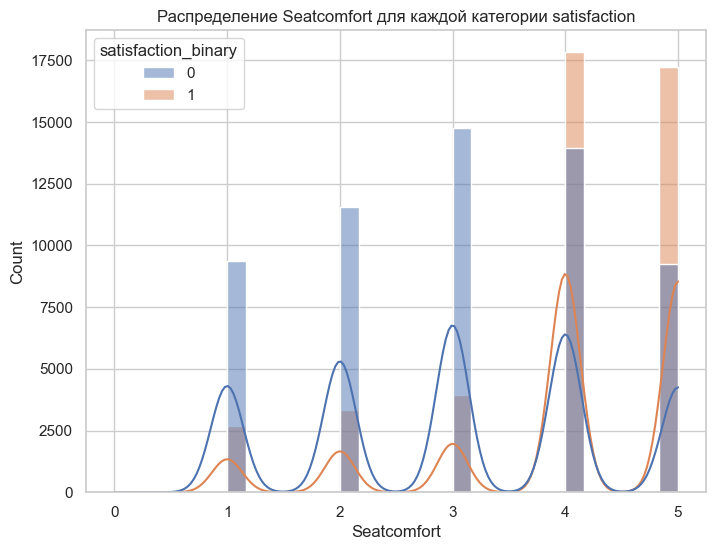

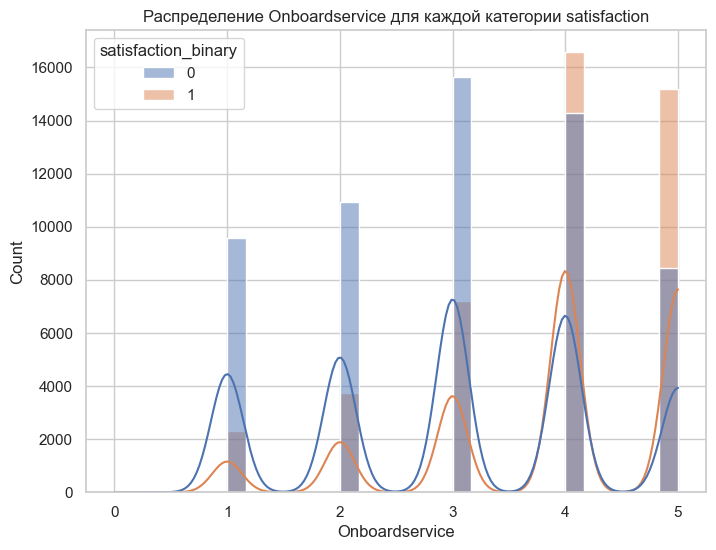

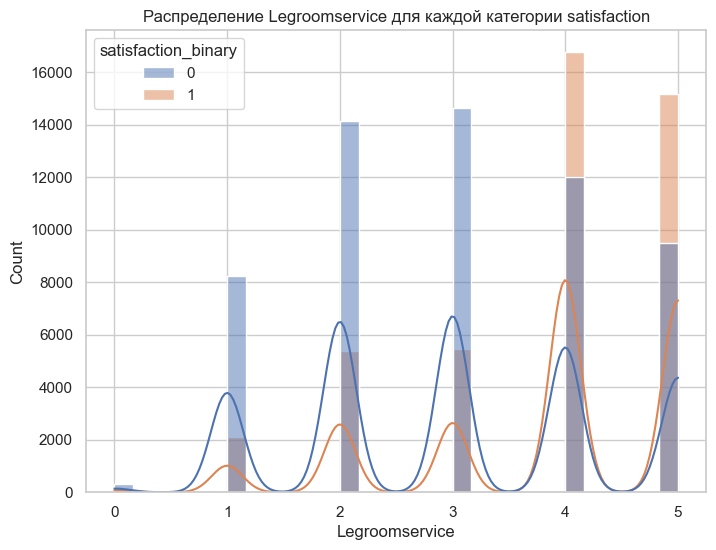

In [45]:
for col in most_correlated_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_train, x=col, hue='satisfaction_binary', kde=True, bins=30)
    plt.title(f'Распределение {col} для каждой категории satisfaction')
    plt.show()

**Делаем выводы:**
- Действительно, при высоких оценках признаков 'Onlineboarding', 'Inflightentertainment', 'Seatcomfort', 'Onboardservice', 'Legroomservice' увеличивается и количество положивтельных оценок всего полета, то есть удовлетворенности

# Feature Engineering

### 1. Заполним пропуски

In [49]:
pd.DataFrame([
    (df_train.isna().sum())[(df_train.isna().sum())>0],
    (df_train.isna().sum()/len(df_train))[(100*df_train.isna().sum()/len(df_train))>0]
], index = ["Кол-во", "%"]).T.style.background_gradient("viridis")

,Кол-во,%
ArrivalDelayinMinutes,310.000000,0.002983


* Столбец ArrivalDelayinMinutes сожержит 310 пропущенных значений (0.002983% от всего количества записей) 

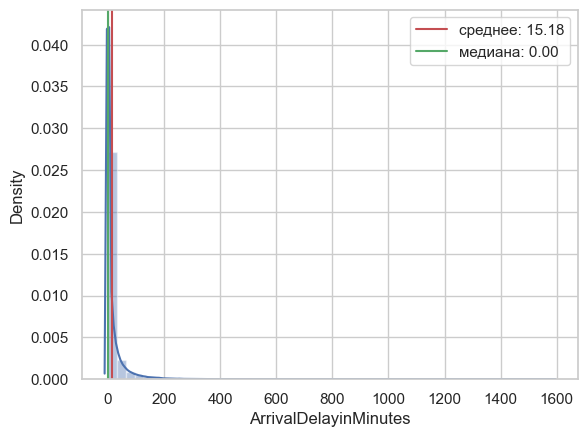

In [51]:
mean = df_train.ArrivalDelayinMinutes.mean()
median = df_train.ArrivalDelayinMinutes.median()
sns.distplot(df_train.ArrivalDelayinMinutes)
plt.axvline(mean, color = "r", label = f'среднее: {mean:.2f}')
plt.axvline(median, color = "g", label = f'медиана: {median:.2f}')
plt.legend()

<Axes: ylabel='ArrivalDelayinMinutes'>

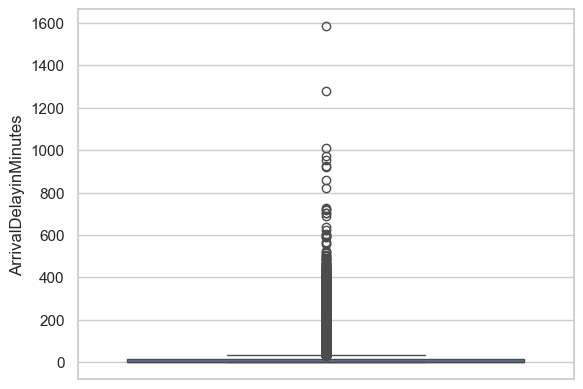

In [52]:
sns.boxplot(df_train.ArrivalDelayinMinutes)

* Практически все ненулевые значения данной переменной — выбросы, так как сам факт задержки прибытия — нетипичная ситуация

Заполним пропуски в этом признаке с помощью медианы. Среднее нам не подходит, так как большое количество выбросов

In [55]:
df_train.fillna({"ArrivalDelayinMinutes":median}, inplace = True)
df_test.fillna({"ArrivalDelayinMinutes":median}, inplace = True)

In [56]:
df_train.isna().sum()

Gender                            0
CustomerType                      0
Age                               0
TypeofTravel                      0
Class                             0
FlightDistance                    0
Inflightwifiservice               0
DepartureArrivaltimeconvenient    0
EaseofOnlinebooking               0
Gatelocation                      0
Foodanddrink                      0
Onlineboarding                    0
Seatcomfort                       0
Inflightentertainment             0
Onboardservice                    0
Legroomservice                    0
Baggagehandling                   0
Checkinservice                    0
Inflightservice                   0
Cleanliness                       0
DepartureDelayinMinutes           0
ArrivalDelayinMinutes             0
satisfaction                      0
satisfaction_binary               0
dtype: int64

In [57]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


Искусственно создадим пропуски в категориальной переменной и также заполним их в признаке Class

In [59]:
df_train.loc[df_train.ArrivalDelayinMinutes.sample(frac = 0.1, random_state = 56), ["Class"]] = np.nan

In [60]:
df_train

,Gender,CustomerType,Age,TypeofTravel,Class,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction,satisfaction_binary
0,Male,Loyal Customer,13,Personal Travel,NaN,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,Male,disloyal Customer,25,Business travel,NaN,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,Female,Loyal Customer,26,Business travel,NaN,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1
3,Female,Loyal Customer,25,Business travel,NaN,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,Male,Loyal Customer,61,Business travel,NaN,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied,0
103903,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied,0


* Посмотрим информацию по этому признаку

In [62]:
df_train.Class.unique()

[NaN, 'Eco', 'Business', 'Eco Plus']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']

In [63]:
df_train.Class.describe()

count       103643
unique           3
top       Business
freq         49540
Name: Class, dtype: object

Это категориальная переменная и мы будем заполнять ее значения модой, но разделим на два случая: 
- пропущенное значение в строке, где TypeofTravel = Business Travel
- пропущенное значение в строке, где TypeofTravel = Personal Travel

In [65]:
pd.pivot_table(data = df_train[["Class", "TypeofTravel"]], index = ["TypeofTravel"], columns = ["Class"], aggfunc = len)

Class,Business,Eco,Eco Plus
TypeofTravel,,,
Business travel,47389,20217,3881
Personal Travel,2151,26409,3596


In [66]:
mode1 = df_train[df_train["TypeofTravel"] == "Business travel"].Class.mode()[0]
mode1

'Business'

In [67]:
mode2 = df_train[df_train["TypeofTravel"] == "Personal Travel"].Class.mode()[0]
mode2

'Eco'

In [68]:
df_train.loc[(df_train.Class.isna())&(df_train.TypeofTravel == "Business travel"), "Class"] = mode1

In [69]:
df_train.loc[(df_train.Class.isna())&(df_train.TypeofTravel == "Personal Travel"), "Class"] = mode2

In [70]:
df_train.isna().sum()

Gender                            0
CustomerType                      0
Age                               0
TypeofTravel                      0
Class                             0
FlightDistance                    0
Inflightwifiservice               0
DepartureArrivaltimeconvenient    0
EaseofOnlinebooking               0
Gatelocation                      0
Foodanddrink                      0
Onlineboarding                    0
Seatcomfort                       0
Inflightentertainment             0
Onboardservice                    0
Legroomservice                    0
Baggagehandling                   0
Checkinservice                    0
Inflightservice                   0
Cleanliness                       0
DepartureDelayinMinutes           0
ArrivalDelayinMinutes             0
satisfaction                      0
satisfaction_binary               0
dtype: int64

In [71]:
df_test.isna().sum()

Gender                            0
CustomerType                      0
Age                               0
TypeofTravel                      0
Class                             0
FlightDistance                    0
Inflightwifiservice               0
DepartureArrivaltimeconvenient    0
EaseofOnlinebooking               0
Gatelocation                      0
Foodanddrink                      0
Onlineboarding                    0
Seatcomfort                       0
Inflightentertainment             0
Onboardservice                    0
Legroomservice                    0
Baggagehandling                   0
Checkinservice                    0
Inflightservice                   0
Cleanliness                       0
DepartureDelayinMinutes           0
ArrivalDelayinMinutes             0
satisfaction                      0
dtype: int64

### 2. Посмотрим выбросы

Построим графики для всех числовых признаков, чтобы изучить их на выбросы

In [74]:
df_train[num_data]

,Age,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0
103903,27,1723,1,3,3,3,1,1,1,1,1,1,4,4,3,1,0,0.0


In [75]:
def box_plots(df, columns):
    for col in columns:
        sns.boxplot(x=df[col])
        plt.title(f'Боксплот для {col}')
        plt.xlabel(col)
        plt.show()

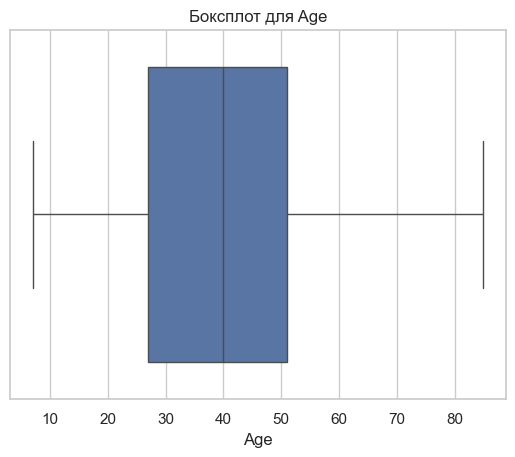

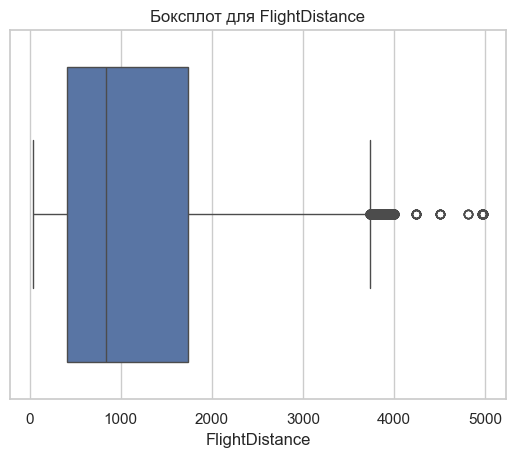

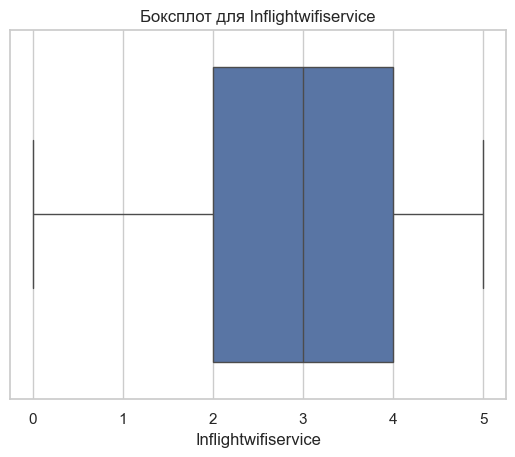

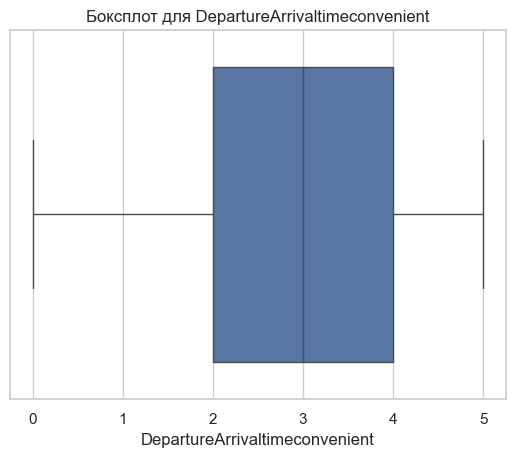

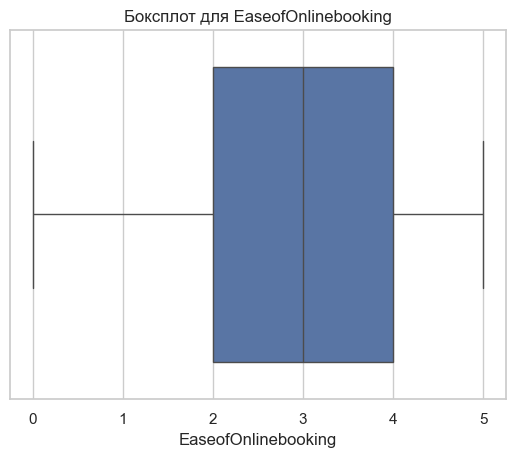

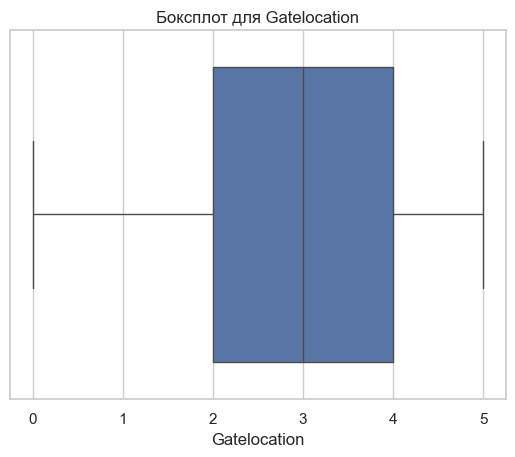

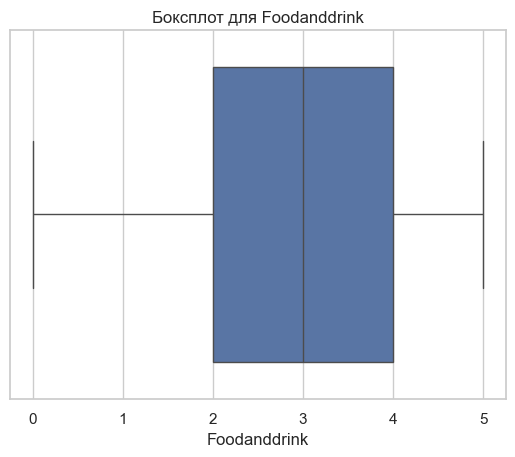

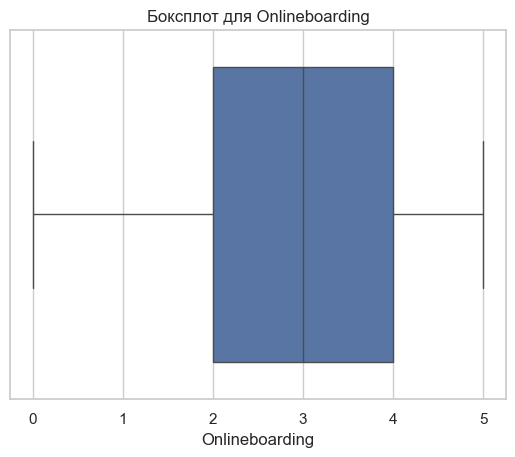

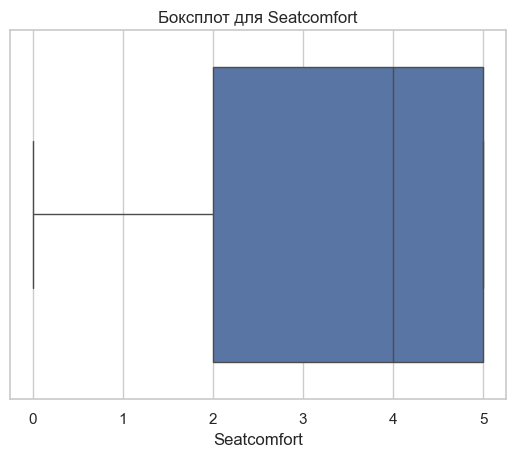

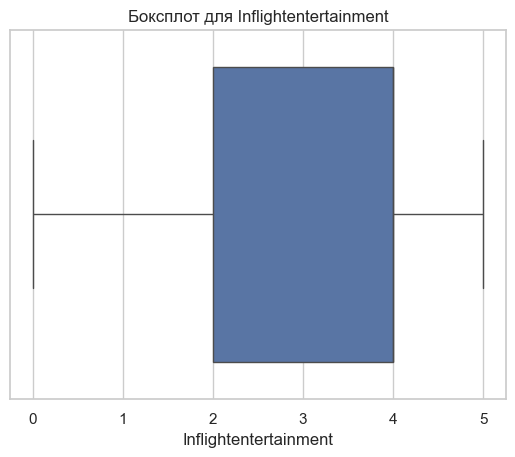

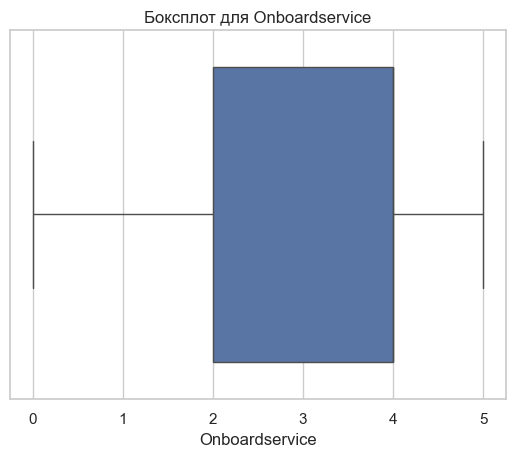

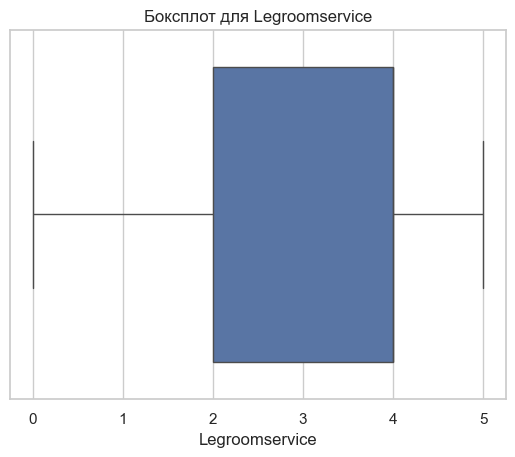

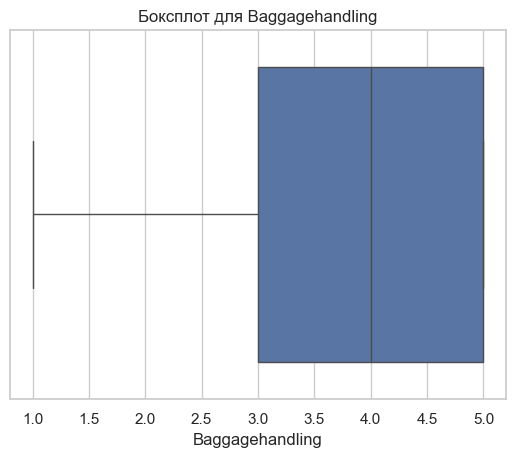

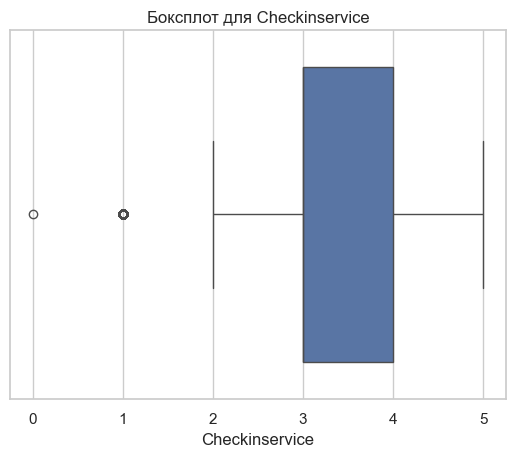

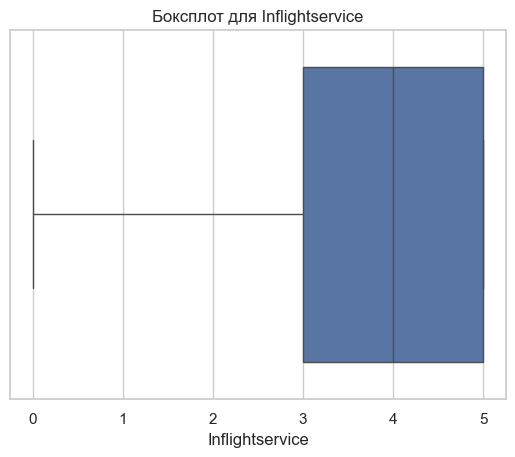

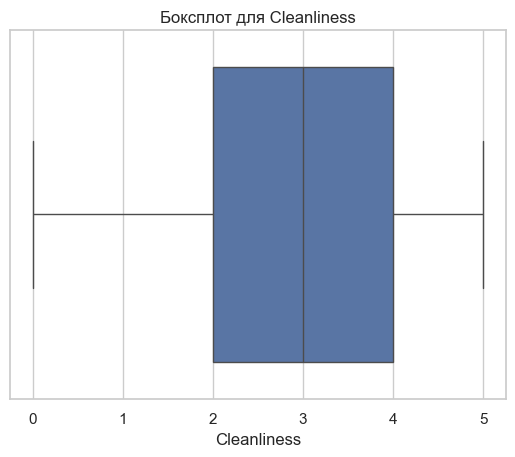

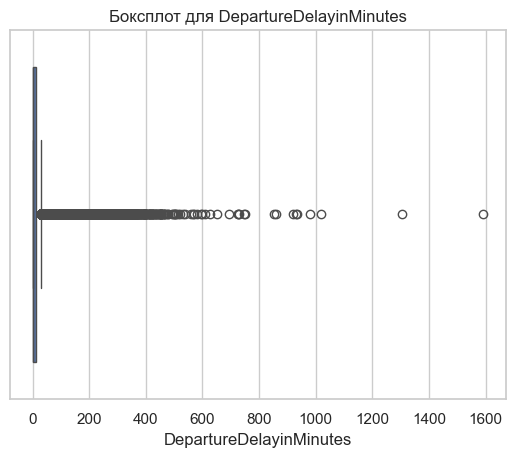

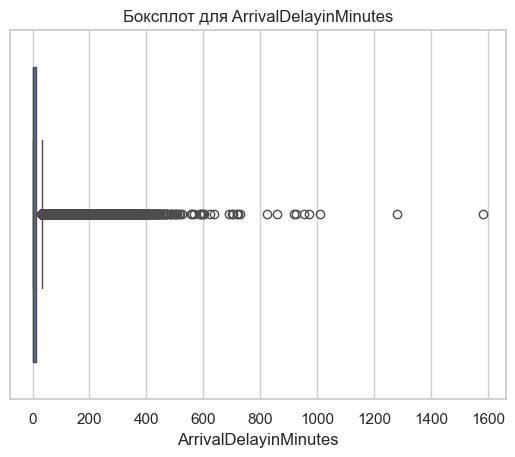

In [76]:
box_plots(df_train, num_data)

У нас есть выбросы в 3 переменных: `FlightDistance`, `Checkinservice`, `DepartureDelayinMinutes`, `ArrivalDelayinMinutes`

Обработаем выбросы в первых двух. В качестве метода выберем **`Усечение & Интерквартильный размах`**, так как это данные с асимметричными (скошенными) распределениями.

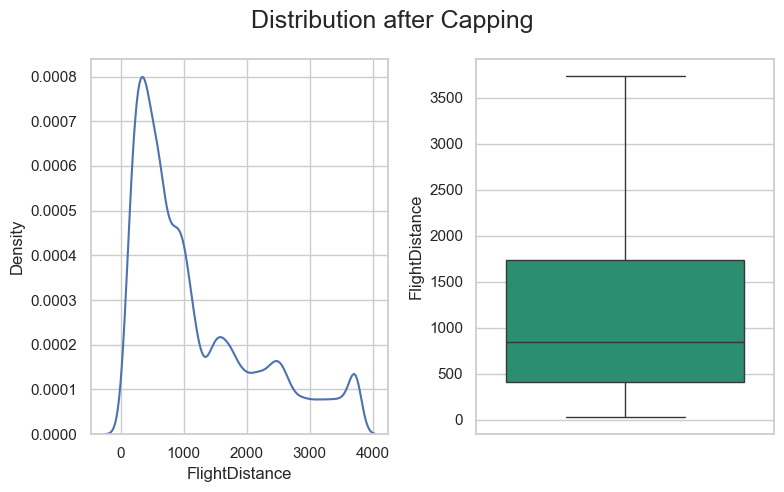

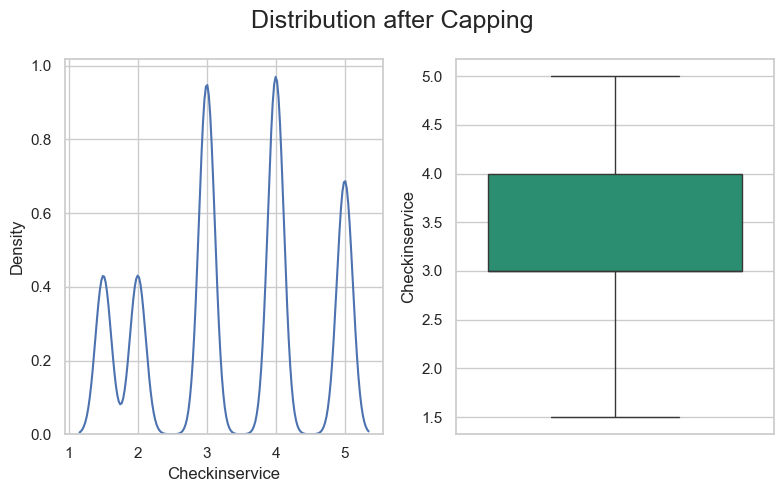

In [78]:
for i in ["FlightDistance", "Checkinservice"]:
    q1 = df_train[i].quantile(0.25)
    q2 = df_train[i].quantile(0.75)
    IQR = q2 - q1
    max_limit = q2 + (1.5 * IQR)
    min_limit = q1 - (1.5 * IQR)
    df_train[i] = pd.DataFrame(np.where(df_train[i] > max_limit, max_limit, 
         (np.where(df_train[i] < min_limit, min_limit, df_train[i]))), columns=[i])

    plt.figure(figsize=(8,5))
    plt.suptitle("Distribution after Capping",fontsize=18)
    plt.subplot(1,2,1)
    sns.kdeplot(data = df_train[i], palette="cool")
    plt.subplot(1,2,2)
    sns.boxplot(data = df_train[i], palette="Dark2")
    plt.tight_layout()
    plt.show()

### 3. Перекодируем категориальные переменные

In [80]:
df_train[cat_data]

,Gender,CustomerType,TypeofTravel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103903,Male,Loyal Customer,Business travel,Business,neutral or dissatisfied


In [81]:
for i in cat_data:
   print(f"{i}:{list(df_train[i].unique())}")

Gender:['Male', 'Female']
CustomerType:['Loyal Customer', 'disloyal Customer']
TypeofTravel:['Personal Travel', 'Business travel']
Class:['Eco', 'Business', 'Eco Plus']
satisfaction:['neutral or dissatisfied', 'satisfied']


Для переменных `Gender`, `CustomerType`, `TypeofTravel` и `satisfaction` применим замену на 0 и 1.

In [83]:
df_train.Gender = df_train.Gender.map({"Male": 1, "Female":0})
df_train.CustomerType = df_train.CustomerType.map({"Loyal Customer": 1, "disloyal Customer":0})
df_train.TypeofTravel = df_train.TypeofTravel.map({"Business travel": 1, "Personal Travel":0})
df_train.satisfaction = df_train.satisfaction.map({"satisfied": 1, "neutral or dissatisfied":0})

df_train.drop(columns = "satisfaction_binary", inplace = True)

In [84]:
df_test.Gender = df_test.Gender.map({"Male": 1, "Female":0})
df_test.CustomerType = df_test.CustomerType.map({"Loyal Customer": 1, "disloyal Customer":0})
df_test.TypeofTravel = df_test.TypeofTravel.map({"Business travel": 1, "Personal Travel":0})
df_test.satisfaction = df_test.satisfaction.map({"satisfied": 1, "neutral or dissatisfied":0})

Для переменной `Class` применим `BinaryEncoder`
- Категориальные значения в бинарный формат и снижает размерность данных по сравнению с `One-Hot Encoding`.

In [86]:
enc = ce.BinaryEncoder(cols=['Class'])
df_train = enc.fit_transform(df_train)
df_train

,Gender,CustomerType,Age,TypeofTravel,Class_0,Class_1,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction
0,1,1,13,0,0,1,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,0
1,1,0,25,1,1,0,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0,0
2,0,1,26,1,1,0,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0,1
3,0,1,25,1,1,0,562.0,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0,0
4,1,1,61,1,1,0,214.0,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103900,1,1,49,1,1,0,2347.0,4,4,4,4,2,4,5,5,5,5,5,5.0,5,4,0,0.0,1
103901,1,0,30,1,1,0,1995.0,1,1,1,3,4,1,5,4,3,2,4,5.0,5,4,7,14.0,0
103902,0,0,22,1,0,1,1000.0,1,1,1,5,1,1,1,1,4,5,1,5.0,4,1,0,0.0,0
103903,1,1,27,1,1,0,1723.0,1,3,3,3,1,1,1,1,1,1,4,4.0,3,1,0,0.0,0


In [87]:
enc = ce.BinaryEncoder(cols=['Class'])
df_test = enc.fit_transform(df_test)
df_test

,Gender,CustomerType,Age,TypeofTravel,Class_0,Class_1,FlightDistance,Inflightwifiservice,DepartureArrivaltimeconvenient,EaseofOnlinebooking,Gatelocation,Foodanddrink,Onlineboarding,Seatcomfort,Inflightentertainment,Onboardservice,Legroomservice,Baggagehandling,Checkinservice,Inflightservice,Cleanliness,DepartureDelayinMinutes,ArrivalDelayinMinutes,satisfaction
103905,0,1,36,1,0,1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1
103906,1,0,20,1,1,0,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0
103907,1,1,44,1,0,1,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1
103908,0,1,49,1,1,0,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,1
103909,1,1,16,1,1,0,311,3,3,3,3,5,5,3,5,4,3,1,1,2,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,34,1,0,1,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,0
129876,1,1,23,1,0,1,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,1
129877,0,1,17,0,1,0,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,0
129878,1,1,14,1,0,1,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,1


### Выбранная метрика  — `F1-мера` — гармоническое среднее между Precision и Recall.

Используем ее, так как классы не идеально сбалансированы, и важно учитывать как полноту, так и точность.

In [89]:
df_train.satisfaction.value_counts(normalize = True)

satisfaction
0    0.566662
1    0.433338
Name: proportion, dtype: float64

# Построение модели

Наш датасет уже разбит на тестовую и обучающие выборки, но соединим их и обоснуем метод разделения.

In [92]:
df = pd.concat([df_train, df_test], ignore_index=True)

### Используем `отложенную выборку`

Она позволяет оценить производительность модели на ранее не виденных данных, что важно для предотвращения переобучения. Она также обеспечивает воспроизводимость результатов благодаря фиксированному разбиению и упрощает сравнение моделей между собой в различных экспериментах, что делает анализ более объективным.

In [94]:
target = 'satisfaction'

X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Масштабирование данных

Логистическая регрессия, которые чувствительна к масштабу признаков, поэтому нам необходимо применить масштабирование данных

In [96]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

### Всю необходимую предобработку данных мы сделали на прошлом этапе `Feature Engineering`. Заполнили все пропущенные значения, осуществили кодирование категориальных переменных и масштабирование данных.

### Возьмем `DummyClassifier` в качестве базовой модели

In [99]:
dummy = DummyClassifier(strategy="most_frequent", random_state=42)
dummy.fit(X_train_scaled, y_train)

DummyClassifier(random_state=42, strategy='most_frequent')

In [100]:
dummy.score(X, y)

0.5655374191561441

In [101]:
y_pred_dummy = dummy.predict(X_test_scaled)

dummy_f1 = f1_score(y_test, y_pred_dummy)
print("F1-мера для dummy:", dummy_f1)
print(classification_report(y_test, y_pred_dummy))

F1-мера для dummy: 0.0
              precision    recall  f1-score   support

           0       0.56      1.00      0.72     14622
           1       0.00      0.00      0.00     11354

    accuracy                           0.56     25976
   macro avg       0.28      0.50      0.36     25976
weighted avg       0.32      0.56      0.41     25976



### Возьмем `логистическую регрессию (LogisticRegression)` в качестве первой простой модели

In [103]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

logreg_f1 = f1_score(y_test, y_pred_logreg)
print("F1-мера для ЛогРег:", logreg_f1)
print(classification_report(y_test, y_pred_logreg))

F1-мера для ЛогРег: 0.8528366401223737
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14622
           1       0.87      0.83      0.85     11354

    accuracy                           0.87     25976
   macro avg       0.87      0.87      0.87     25976
weighted avg       0.87      0.87      0.87     25976



### Возьмем `дерево решений (DecisionTreeClassifier)` в качестве второй простой модели

In [105]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

tree_f1 = f1_score(y_test, y_pred_tree)
print("F1-мера для дерева решений:", tree_f1)
print(classification_report(y_test, y_pred_tree))

F1-мера для дерева решений: 0.934413954102982
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14622
           1       0.93      0.93      0.93     11354

    accuracy                           0.94     25976
   macro avg       0.94      0.94      0.94     25976
weighted avg       0.94      0.94      0.94     25976



In [106]:
print(f"Сравнение F1-меры:\nDummyClassifier: {dummy_f1}\nLogistic Regression: {logreg_f1}\nDecision Tree: {tree_f1}")

Сравнение F1-меры:
DummyClassifier: 0.0
Logistic Regression: 0.8528366401223737
Decision Tree: 0.934413954102982


#### 1. Базовая модель (DummyClassifier):
- F1-метрика: 0.00
- Эта модель просто выбирает самый частый класс в данных и никак не учитывает особенности признаков. В итоге она не смогла предсказать ни одного положительного класса, что и отразилось на нулевой F1-метрике.

#### 2. Логистическая регрессия:
- F1-метрика: 0.85
- Модель справилась отлично, учитывая зависимости между признаками. Особенно помогло масштабирование данных перед обучением, поскольку логистическая регрессия чувствительна к разным масштабам признаков.

#### **3. Дерево решений:**
- F1-метрика: 0.93
- Дерево решений показало наилучший результат, так как способно выявлять сложные связи и взаимодействия между признаками. Однако есть риск переобучения, особенно если не ограничивать глубину дерева.

